<a href="https://colab.research.google.com/github/jao11/monografia/blob/main/codigo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas:


## Montando o Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Instalando bibliotecas e fazendo imports necessarios:

In [2]:
!pip install plot-metric ## For plotting ROC at the end

from joblib import load
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,precision_recall_curve
from sklearn.metrics import confusion_matrix
from plot_metric.functions import BinaryClassification
from sklearn.ensemble import VotingClassifier

import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados:

## Constantes facilitadoras e colunas:

In [3]:
# Constantes:

PATH = '/content/drive/MyDrive/material_uerj/Monografia/minha_monografia/codigo/'
PATH2 = 'refazendo/treino/'
PATH3 = 'refazendo/machine_learning/arquivos_treinados'
PATH4 = 'refazendo/analise_dos_dados_ml/figuras'

colunas_LGBM = [b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep', b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta', b'jetAK8_prunedMass', b'jetAK8_tau21',
            b'METPt', b'muon_pt', b'muon_eta', b'ExtraTracks', b'W_rapidity', b'xi1', b'xi2',  b'Mpps', b'Ypps', b'Mww/Mpps', b'Ypps-Yww']


## Abrindo modelos:

In [4]:
# x_train:

x_anomalo_1_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_1_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_2_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_2_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_3_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_3_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_4_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_4_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_5_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_5_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_6_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_6_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_7_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_7_train.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_8_train = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_train/x_anomalo_8_train.h5','r')['treino']),columns=colunas_LGBM)


# x_test:

x_anomalo_1_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_1_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_2_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_2_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_3_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_3_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_4_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_4_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_5_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_5_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_6_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_6_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_7_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_7_test.h5','r')['treino']),columns=colunas_LGBM)
x_anomalo_8_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'x_test/x_anomalo_8_test.h5','r')['treino']),columns=colunas_LGBM)

# y_test:

y_anomalo_1_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_1_test.h5','r')['treino']))#,columns=colunas_LGBM)
y_anomalo_2_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_2_test.h5','r')['treino']))
y_anomalo_3_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_3_test.h5','r')['treino']))
y_anomalo_4_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_4_test.h5','r')['treino']))
y_anomalo_5_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_5_test.h5','r')['treino']))
y_anomalo_6_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_6_test.h5','r')['treino']))
y_anomalo_7_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_7_test.h5','r')['treino']))
y_anomalo_8_test = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'y_test/y_anomalo_8_test.h5','r')['treino']))

# pesos:

weight_anomalo_1 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_1.h5','r')['treino']))#,columns=colunas_LGBM)
weight_anomalo_2 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_2.h5','r')['treino']))
weight_anomalo_3 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_3.h5','r')['treino']))
weight_anomalo_4 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_4.h5','r')['treino']))
weight_anomalo_5 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_5.h5','r')['treino']))
weight_anomalo_6 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_6.h5','r')['treino']))
weight_anomalo_7 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_7.h5','r')['treino']))
weight_anomalo_8 = pd.DataFrame(np.array(h5py.File(PATH + PATH2 + 'weight_anomalo/weight_anomalo_8.h5','r')['treino']))



In [5]:
#model0 = load(PATH +  PATH_2 + '/ligthGBM_binario_SM_DataDriven.joblib')
voting_clf_soft_1 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_1_DataDriven.joblib')
voting_clf_soft_2 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_2_DataDriven.joblib')
voting_clf_soft_3 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_3_DataDriven.joblib')
voting_clf_soft_4 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_4_DataDriven.joblib')
voting_clf_soft_5 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_5_DataDriven.joblib')
voting_clf_soft_6 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_6_DataDriven.joblib')
voting_clf_soft_7 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_7_DataDriven.joblib')
voting_clf_soft_8 = load(PATH +  PATH3 + '/ligthGBM_binario_anomalo_8_DataDriven.joblib')

lor_clf_binario_1 = load(PATH +  PATH3 + '/logisticregression/lor_clf_binario_anomalo_1_DataDriven.joblib')

[12:52:34] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[12:52:34] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[12:52:35] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, pl

# Analise dos modelos criados pelo ML:



## Anomalo 1:

In [6]:
# anomalo 1
#y_anomalo_1_pred = voting_clf_soft_1.predict(x_anomalo_1_test)
ns_probs_anomalo_1 = [0 for _ in range(len(y_anomalo_1_test))]

# predict probabilities
lr_probs_anomalo_1 = voting_clf_soft_1.predict_proba(x_anomalo_1_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_1 = lr_probs_anomalo_1[:, 1]

prec_anomalo_1, rec_anomalo_1, thresh_anomalo_1 = precision_recall_curve(y_anomalo_1_test, lr_probs_anomalo_1, sample_weight = weight_anomalo_1/0.3)
bidx_anomalo_1 = np.argmax(2*prec_anomalo_1 * rec_anomalo_1/(prec_anomalo_1 + rec_anomalo_1))
best_cut_anomalo_1 = thresh_anomalo_1[bidx_anomalo_1]
preds_anomalo_1 = lr_probs_anomalo_1 >= best_cut_anomalo_1

f1_anomalo_1 = f1_score(preds_anomalo_1, y_anomalo_1_test)
print('LightGBM Model f1 score for Anomalous 1: {0:0.4f}'.format(f1_score(y_anomalo_1_test, preds_anomalo_1)))
print('LightGBM Model Precision for Anomalous 1: {0:0.4f}'.format(precision_score(y_anomalo_1_test, preds_anomalo_1)))
print('LightGBM Model Recall for Anomalous 1: {0:0.4f}'.format(recall_score(y_anomalo_1_test, preds_anomalo_1)))


LightGBM Model f1 score for Anomalous 1: 0.9456
LightGBM Model Precision for Anomalous 1: 0.9720
LightGBM Model Recall for Anomalous 1: 0.9206


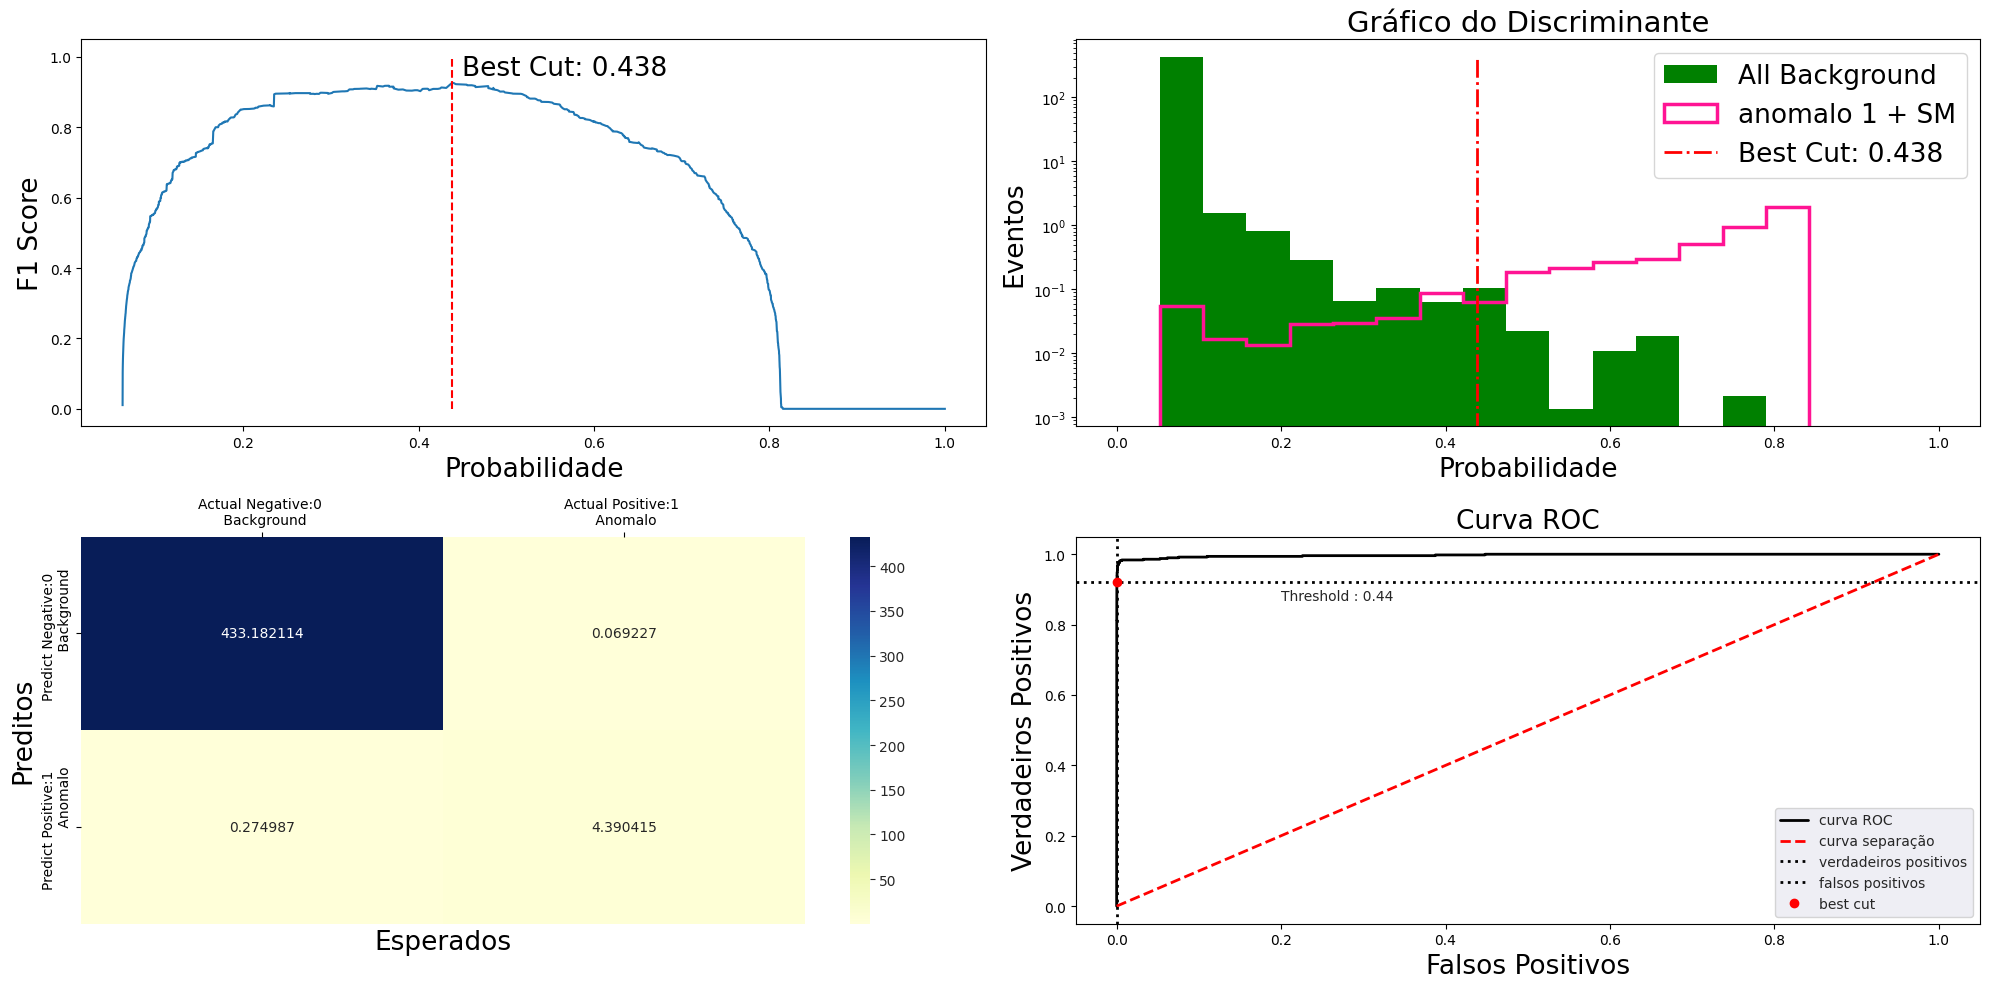

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_1], [1]), prec_anomalo_1 * rec_anomalo_1)
ax[0, 0].plot([best_cut_anomalo_1, best_cut_anomalo_1], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_1[y_anomalo_1_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0] == 1],
              weights=weight_anomalo_1[y_anomalo_1_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 1 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_1, best_cut_anomalo_1], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc1 = BinaryClassification(y_anomalo_1_test, lr_probs_anomalo_1, threshold=best_cut_anomalo_1, labels=["Class 1", "Class 2"])
bc1.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm1 = confusion_matrix(y_anomalo_1_test[0], preds_anomalo_1, sample_weight=weight_anomalo_1[0] / 0.3)
cm_matrix1 = pd.DataFrame(data=cm1,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_1 = sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_1.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_1/plot_anomalo_1.png',dpi=300)

plt.tight_layout()
plt.show()



### Plots separados:

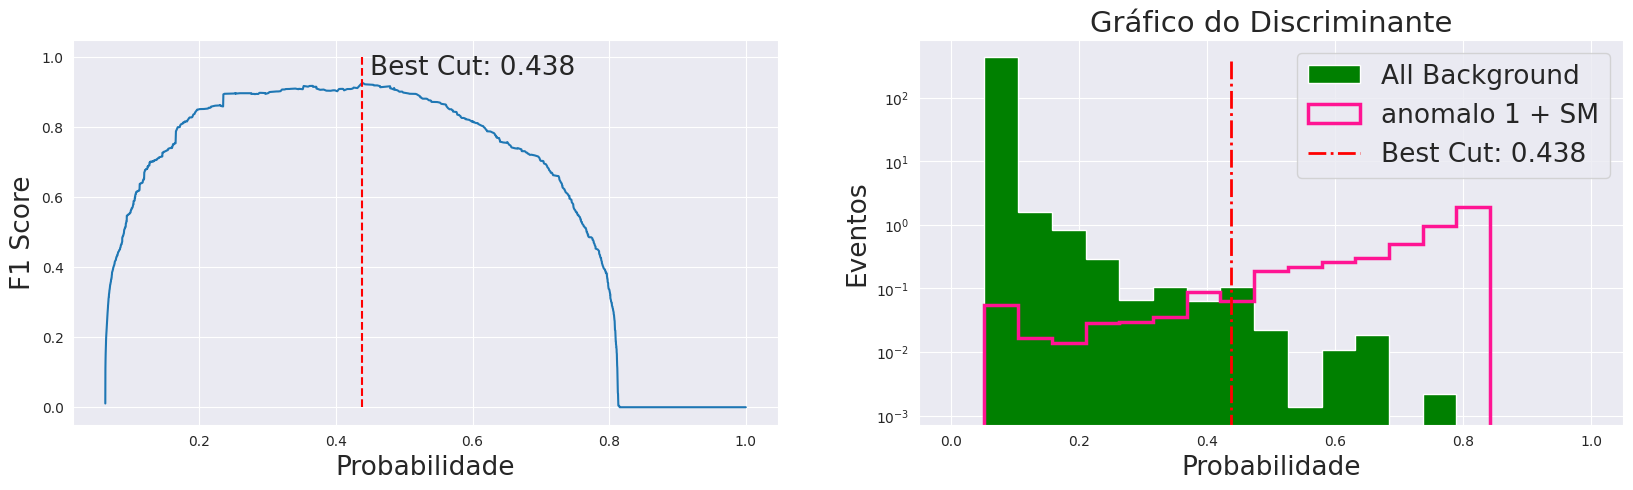

In [8]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_1],[1]),prec_anomalo_1*rec_anomalo_1)
ax[0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_1[y_anomalo_1_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==1], weights = weight_anomalo_1[y_anomalo_1_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 1 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_1/discriminante_f1_score.png',dpi=300)



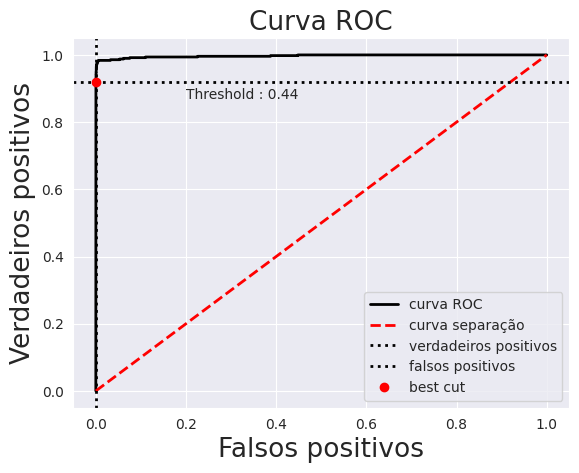

In [9]:
bc1 = BinaryClassification(y_anomalo_1_test, lr_probs_anomalo_1, threshold =best_cut_anomalo_1,labels=["Class 1", "Class 2"])

# Figures
bc1.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_1/curva_ROC.png',dpi=300)

Confusion matrix

 [[4.33182114e+02 6.92272130e-02]
 [2.74987313e-01 4.39041499e+00]]

True negatives(TN) =  433.1821144405621

True positives(TP) =  4.390414994362313

False negatives(FN) =  0.06922721303067964

False positives(FP) =  0.2749873133461924



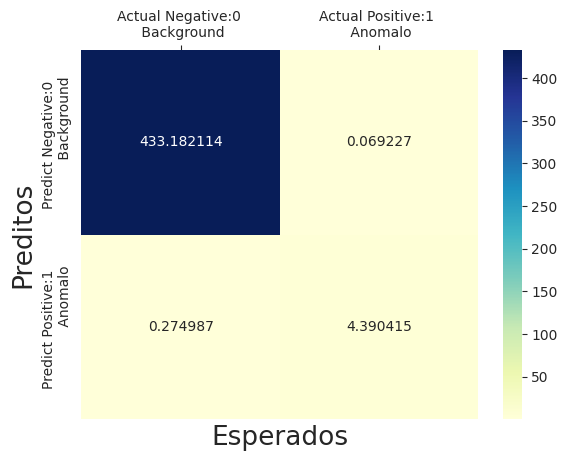

In [10]:
cm1 = confusion_matrix(y_anomalo_1_test[0], preds_anomalo_1, sample_weight = weight_anomalo_1[0]/0.3)
print('Confusion matrix\n\n', cm1)
print('\nTrue negatives(TN) = ', cm1[0,0])
print('\nTrue positives(TP) = ', cm1[1,1])
print('\nFalse negatives(FN) = ', cm1[0,1])
print('\nFalse positives(FP) = ', cm1[1,0])
print('')

cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_1 = sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_1.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_1/matriz_de_confusao_1.png',dpi=100)


### Feature:

In [11]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """

    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_

    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [12]:
df = pd.DataFrame()
df['Feature'] = X_train.columns
df['Feature Importance'] = compute_feature_importance(voting_clf, [1, 1, 2])
df.sort_values('Feature Importance', ascending=False)

NameError: ignored

In [ ]:
feature_imp1 = pd.DataFrame(sorted(zip(lor_clf_binario_1.feature_importances_,x_anomalo_1_train.columns)), columns=['Value','Feature'])

sns.barplot(x="Value", y="Feature", data=feature_imp1.sort_values(by="Value", ascending=False))
plt.title(r'$\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6}$ GeV')
plt.tight_layout()
plt.show()

## Anomalo 2:

In [13]:
# anomalo 2
ns_probs_anomalo_2 = [0 for _ in range(len(y_anomalo_2_test))]

# predict probabilities
lr_probs_anomalo_2 = voting_clf_soft_2.predict_proba(x_anomalo_2_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_2 = lr_probs_anomalo_2[:, 1]

prec_anomalo_2, rec_anomalo_2, thresh_anomalo_2 = precision_recall_curve(y_anomalo_2_test, lr_probs_anomalo_2, sample_weight = weight_anomalo_2/0.3)
bidx_anomalo_2 = np.argmax(2*prec_anomalo_2 * rec_anomalo_2/(prec_anomalo_2 + rec_anomalo_2))
best_cut_anomalo_2 = thresh_anomalo_2[bidx_anomalo_2]
preds_anomalo_2 = lr_probs_anomalo_2 >= best_cut_anomalo_2

f1_anomalo_2 = f1_score(preds_anomalo_2, y_anomalo_2_test)
print('LightGBM Model f1 score for Anomalous 2: {0:0.4f}'.format(f1_score(y_anomalo_2_test, preds_anomalo_2)))
print('LightGBM Model Precision for Anomalous 2: {0:0.4f}'.format(precision_score(y_anomalo_2_test, preds_anomalo_2)))
print('LightGBM Model Recall for Anomalous 2: {0:0.4f}'.format(recall_score(y_anomalo_2_test, preds_anomalo_2)))

LightGBM Model f1 score for Anomalous 2: 0.8903
LightGBM Model Precision for Anomalous 2: 0.9583
LightGBM Model Recall for Anomalous 2: 0.8313


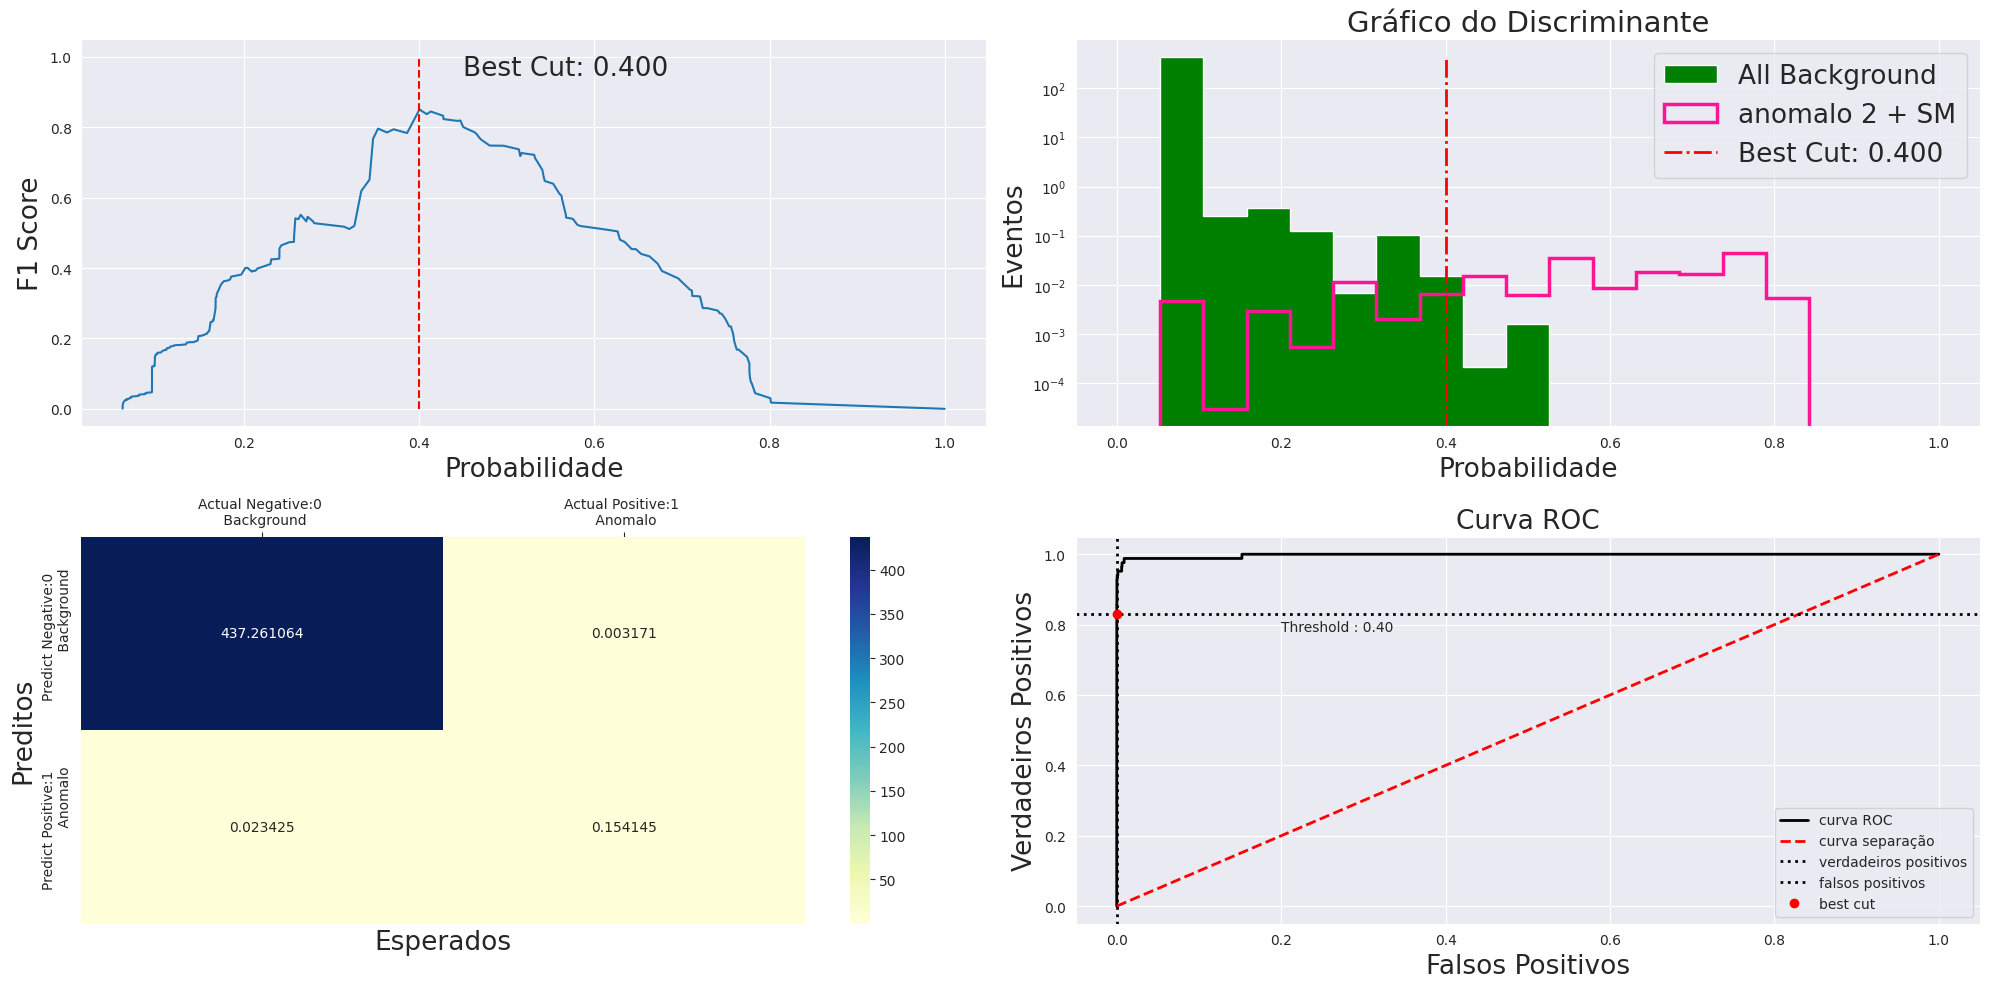

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_2], [1]), prec_anomalo_2 * rec_anomalo_2)
ax[0, 0].plot([best_cut_anomalo_2, best_cut_anomalo_2], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_2), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_2[y_anomalo_2_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_2[y_anomalo_2_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_2[y_anomalo_2_test[0] == 1],
              weights=weight_anomalo_2[y_anomalo_2_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 2 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_2, best_cut_anomalo_2], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_2), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc1 = BinaryClassification(y_anomalo_2_test, lr_probs_anomalo_2, threshold=best_cut_anomalo_2, labels=["Class 1", "Class 2"])
bc1.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm2 = confusion_matrix(y_anomalo_2_test[0], preds_anomalo_2, sample_weight=weight_anomalo_2[0] / 0.3)
cm_matrix2 = pd.DataFrame(data=cm2,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_2 = sns.heatmap(cm_matrix2, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_2.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_2/plot_anomalo_2.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados:

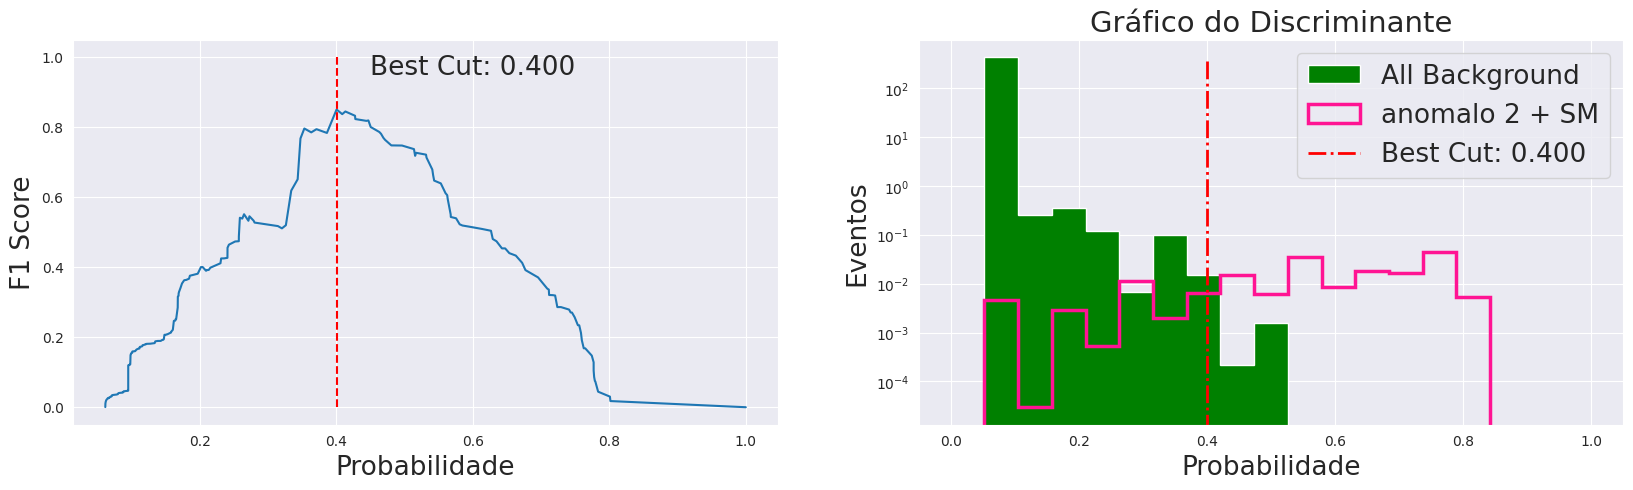

In [15]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_2],[1]),prec_anomalo_2*rec_anomalo_2)
ax[0].plot([best_cut_anomalo_2,best_cut_anomalo_2],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_2), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_2[y_anomalo_2_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_2[y_anomalo_2_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_2[y_anomalo_2_test[0]==1], weights = weight_anomalo_2[y_anomalo_2_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 2 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_2,best_cut_anomalo_2],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_2),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_2/discriminante_f1_score_a2.png',dpi=300)



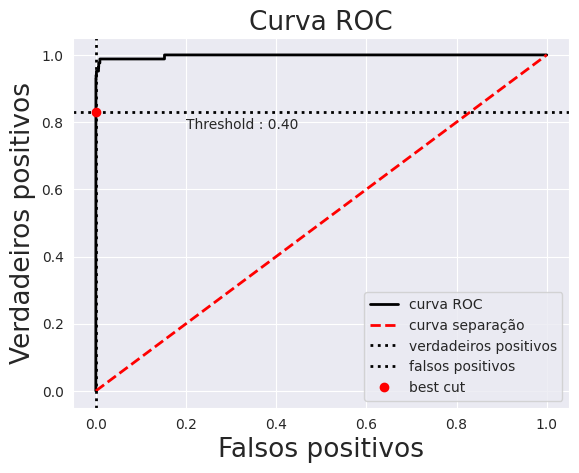

In [16]:
bc2 = BinaryClassification(y_anomalo_2_test, lr_probs_anomalo_2, threshold =best_cut_anomalo_2,labels=["Class 1", "Class 2"])

# Figures
bc2.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_2/curva_ROC_a2.png',dpi=300)

Confusion matrix

 [[4.37261064e+02 3.17109872e-03]
 [2.34252654e-02 1.54145304e-01]]

True negatives(TN) =  437.26106420858076

True positives(TP) =  0.15414530396928966

False negatives(FN) =  0.003171098717779147

False positives(FP) =  0.02342526542554564



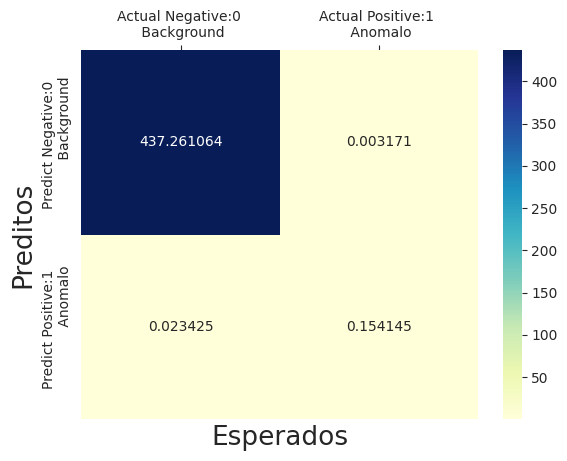

In [17]:
cm2 = confusion_matrix(y_anomalo_2_test[0], preds_anomalo_2, sample_weight = weight_anomalo_2[0]/0.3)
print('Confusion matrix\n\n', cm2)
print('\nTrue negatives(TN) = ', cm2[0,0])
print('\nTrue positives(TP) = ', cm2[1,1])
print('\nFalse negatives(FN) = ', cm2[0,1])
print('\nFalse positives(FP) = ', cm2[1,0])
print('')

cm_matrix2 = pd.DataFrame(data=cm2, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_2 = sns.heatmap(cm_matrix2, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_2.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_2/matriz_de_confusao_a2.png',dpi=100)


## Anomalo 3:

In [18]:
# anomalo 3
ns_probs_anomalo_3 = [0 for _ in range(len(y_anomalo_3_test))]

# predict probabilities
lr_probs_anomalo_3 = voting_clf_soft_3.predict_proba(x_anomalo_3_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_3 = lr_probs_anomalo_3[:, 1]

prec_anomalo_3, rec_anomalo_3, thresh_anomalo_3 = precision_recall_curve(y_anomalo_3_test, lr_probs_anomalo_3, sample_weight = weight_anomalo_3/0.3)
bidx_anomalo_3 = np.argmax(2*prec_anomalo_3 * rec_anomalo_3/(prec_anomalo_3 + rec_anomalo_3))
best_cut_anomalo_3 = thresh_anomalo_3[bidx_anomalo_3]
preds_anomalo_3 = lr_probs_anomalo_3 >= best_cut_anomalo_3

f1_anomalo_3 = f1_score(preds_anomalo_3, y_anomalo_3_test)
print('LightGBM Model f1 score for Anomalous 3: {0:0.4f}'.format(f1_score(y_anomalo_3_test, preds_anomalo_3)))
print('LightGBM Model Precision for Anomalous 3: {0:0.4f}'.format(precision_score(y_anomalo_3_test, preds_anomalo_3)))
print('LightGBM Model Recall for Anomalous 3: {0:0.4f}'.format(recall_score(y_anomalo_3_test, preds_anomalo_3)))


LightGBM Model f1 score for Anomalous 3: 0.9481
LightGBM Model Precision for Anomalous 3: 1.0000
LightGBM Model Recall for Anomalous 3: 0.9012


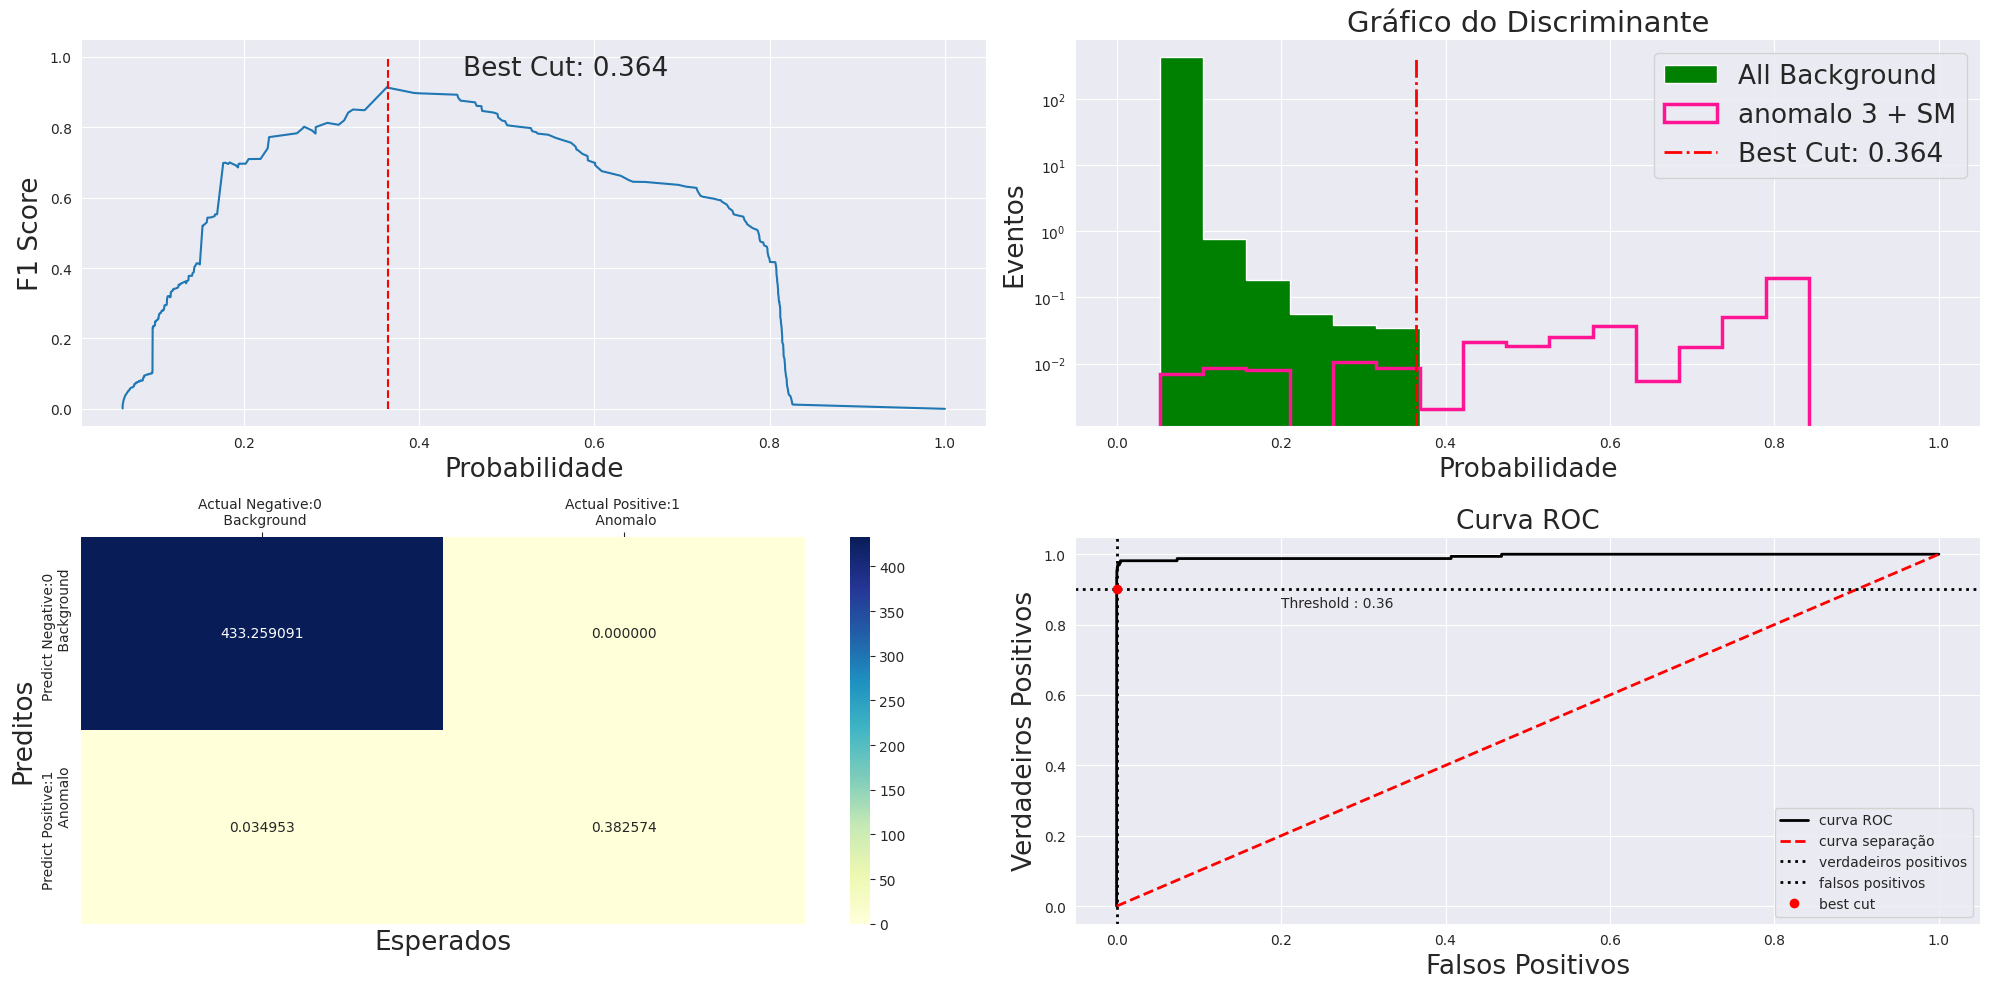

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_3], [1]), prec_anomalo_3 * rec_anomalo_3)
ax[0, 0].plot([best_cut_anomalo_3, best_cut_anomalo_3], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_3), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_3[y_anomalo_3_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_3[y_anomalo_3_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_3[y_anomalo_3_test[0] == 1],
              weights=weight_anomalo_3[y_anomalo_3_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 3 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_3, best_cut_anomalo_3], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_3), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc1 = BinaryClassification(y_anomalo_3_test, lr_probs_anomalo_3, threshold=best_cut_anomalo_3, labels=["Class 1", "Class 2"])
bc1.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm3 = confusion_matrix(y_anomalo_3_test[0], preds_anomalo_3, sample_weight=weight_anomalo_3[0] / 0.3)
cm_matrix3 = pd.DataFrame(data=cm3,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_3 = sns.heatmap(cm_matrix3, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_3.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_3/plot_anomalo_3.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados:

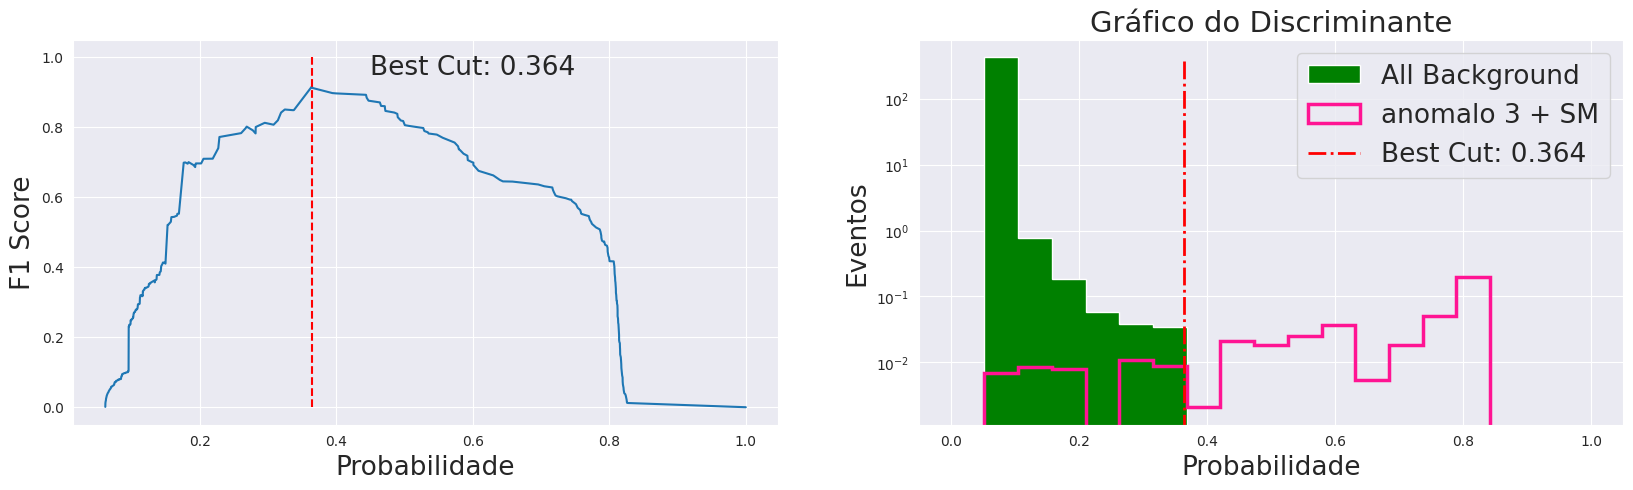

In [20]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_3],[1]),prec_anomalo_3*rec_anomalo_3)
ax[0].plot([best_cut_anomalo_3,best_cut_anomalo_3],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_3), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_3[y_anomalo_3_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_3[y_anomalo_3_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_3[y_anomalo_3_test[0]==1], weights = weight_anomalo_3[y_anomalo_3_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 3 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_3,best_cut_anomalo_3],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_3),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_3/discriminante_f1_score_a3.png',dpi=300)








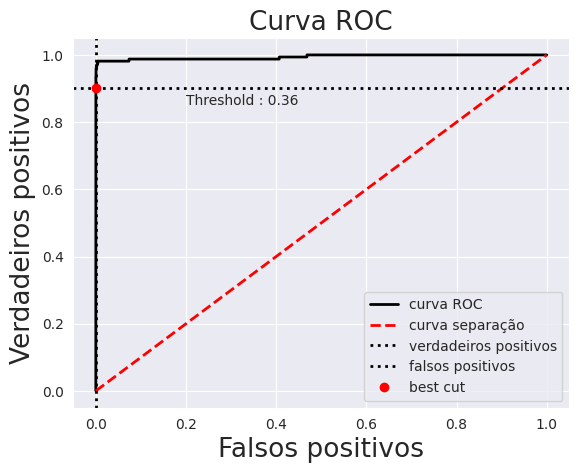

In [21]:
bc3 = BinaryClassification(y_anomalo_3_test, lr_probs_anomalo_3, threshold =best_cut_anomalo_3,labels=["Class 1", "Class 2"])

# Figures
bc3.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_3/curva_ROC_a3.png',dpi=300)

Confusion matrix

 [[4.33259091e+02 0.00000000e+00]
 [3.49531534e-02 3.82574238e-01]]

True negatives(TN) =  433.2590911172529

True positives(TP) =  0.38257423842922006

False negatives(FN) =  0.0

False positives(FP) =  0.034953153394491



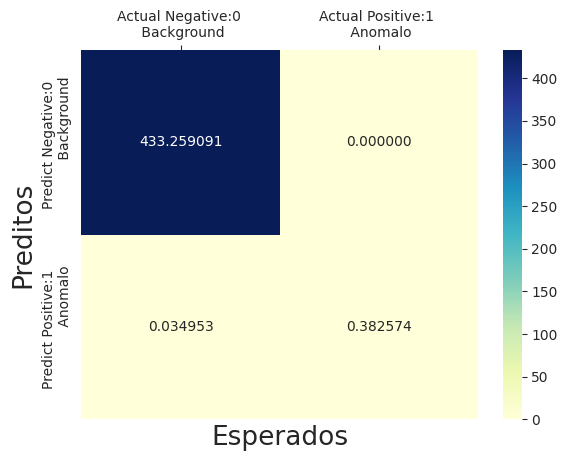

In [22]:
cm3 = confusion_matrix(y_anomalo_3_test[0], preds_anomalo_3, sample_weight = weight_anomalo_3[0]/0.3)
print('Confusion matrix\n\n', cm3)
print('\nTrue negatives(TN) = ', cm3[0,0])
print('\nTrue positives(TP) = ', cm3[1,1])
print('\nFalse negatives(FN) = ', cm3[0,1])
print('\nFalse positives(FP) = ', cm3[1,0])
print('')

cm_matrix3 = pd.DataFrame(data=cm3, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_3 = sns.heatmap(cm_matrix3, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_3.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_3/matriz_de_confusao_a3.png',dpi=100)


## Anomalo 4:

In [23]:
# anomalo 4
ns_probs_anomalo_4 = [0 for _ in range(len(y_anomalo_4_test))]

# predict probabilities
lr_probs_anomalo_4 = voting_clf_soft_4.predict_proba(x_anomalo_4_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_4 = lr_probs_anomalo_4[:, 1]

prec_anomalo_4, rec_anomalo_4, thresh_anomalo_4 = precision_recall_curve(y_anomalo_4_test, lr_probs_anomalo_4, sample_weight = weight_anomalo_4/0.3)
bidx_anomalo_4 = np.argmax(2*prec_anomalo_4 * rec_anomalo_4/(prec_anomalo_4 + rec_anomalo_4))
best_cut_anomalo_4 = thresh_anomalo_4[bidx_anomalo_4]
preds_anomalo_4 = lr_probs_anomalo_4 >= best_cut_anomalo_4

f1_anomalo_4 = f1_score(preds_anomalo_4, y_anomalo_4_test)
print('LightGBM Model f1 score for Anomalous 4: {0:0.4f}'.format(f1_score(y_anomalo_4_test, preds_anomalo_4)))
print('LightGBM Model Precision for Anomalous 4: {0:0.4f}'.format(precision_score(y_anomalo_4_test, preds_anomalo_4)))
print('LightGBM Model Recall for Anomalous 4: {0:0.4f}'.format(recall_score(y_anomalo_4_test, preds_anomalo_4)))


LightGBM Model f1 score for Anomalous 4: 0.9405
LightGBM Model Precision for Anomalous 4: 0.9745
LightGBM Model Recall for Anomalous 4: 0.9087


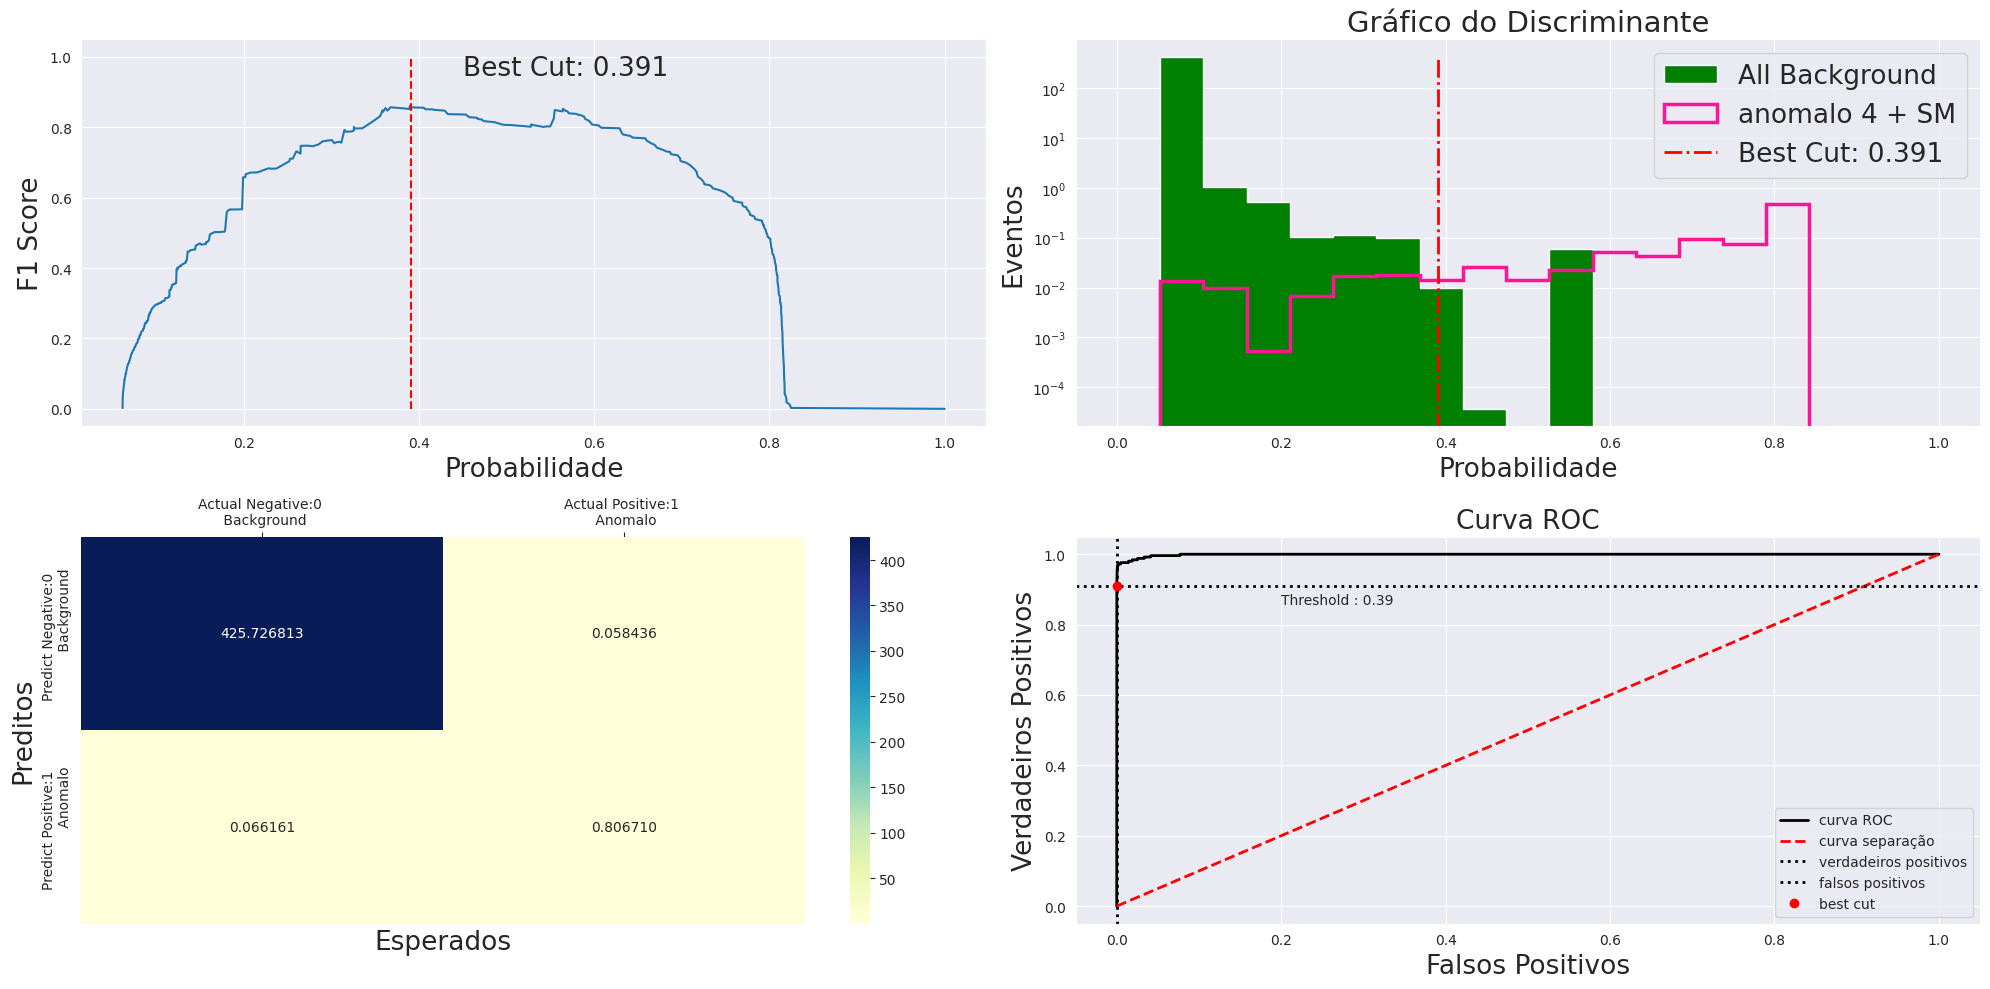

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_4], [1]), prec_anomalo_4 * rec_anomalo_4)
ax[0, 0].plot([best_cut_anomalo_4, best_cut_anomalo_4], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_4), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_4[y_anomalo_4_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_4[y_anomalo_4_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_4[y_anomalo_4_test[0] == 1],
              weights=weight_anomalo_4[y_anomalo_4_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 4 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_4, best_cut_anomalo_4], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_4), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc1 = BinaryClassification(y_anomalo_4_test, lr_probs_anomalo_4, threshold=best_cut_anomalo_4, labels=["Class 1", "Class 2"])
bc1.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm4 = confusion_matrix(y_anomalo_4_test[0], preds_anomalo_4, sample_weight=weight_anomalo_4[0] / 0.3)
cm_matrix4 = pd.DataFrame(data=cm4,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_4 = sns.heatmap(cm_matrix4, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_4.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_4/plot_anomalo_4.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados:

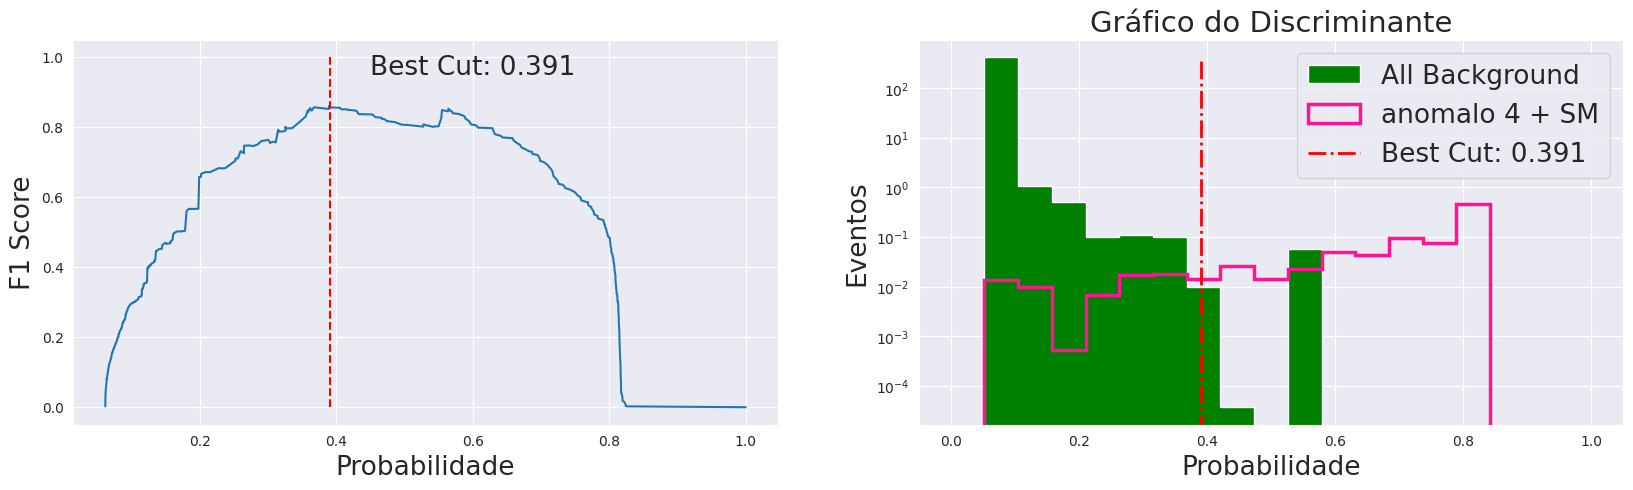

In [25]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_4],[1]),prec_anomalo_4*rec_anomalo_4)
ax[0].plot([best_cut_anomalo_4,best_cut_anomalo_4],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_4), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_4[y_anomalo_4_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_4[y_anomalo_4_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_4[y_anomalo_4_test[0]==1], weights = weight_anomalo_4[y_anomalo_4_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 4 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_4,best_cut_anomalo_4],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_4),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_4/discriminante_f1_score_a4.png',dpi=300)




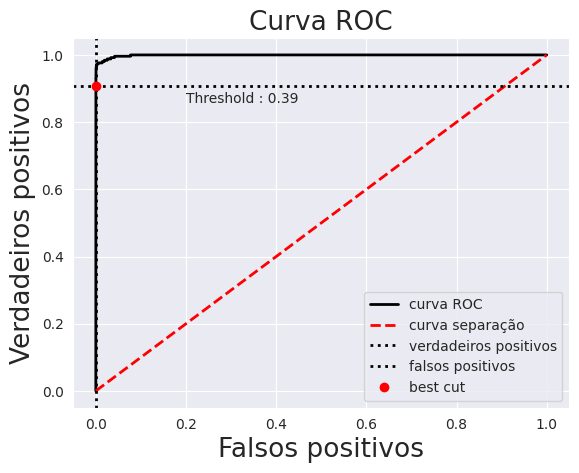

In [26]:
bc4 = BinaryClassification(y_anomalo_4_test, lr_probs_anomalo_4, threshold =best_cut_anomalo_4,labels=["Class 1", "Class 2"])

# Figures
bc4.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_4/curva_ROC_a4.png',dpi=300)

Confusion matrix

 [[4.25726813e+02 5.84355444e-02]
 [6.61614483e-02 8.06709649e-01]]

True negatives(TN) =  425.7268130882689

True positives(TP) =  0.8067096487367951

False negatives(FN) =  0.05843554440387558

False positives(FP) =  0.06616144830073807



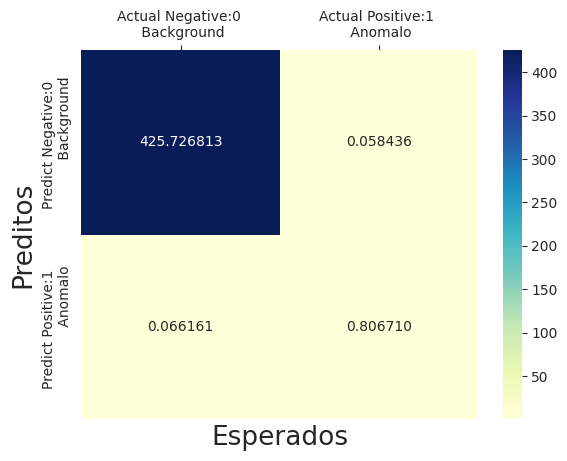

In [27]:
cm4 = confusion_matrix(y_anomalo_4_test[0], preds_anomalo_4, sample_weight = weight_anomalo_4[0]/0.3)
print('Confusion matrix\n\n', cm4)
print('\nTrue negatives(TN) = ', cm4[0,0])
print('\nTrue positives(TP) = ', cm4[1,1])
print('\nFalse negatives(FN) = ', cm4[0,1])
print('\nFalse positives(FP) = ', cm4[1,0])
print('')

cm_matrix4 = pd.DataFrame(data=cm4, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_4 = sns.heatmap(cm_matrix4, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_4.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_4/matriz_de_confusao_a4.png',dpi=100)

## Anomalo 5:

In [28]:
# anomalo 5
ns_probs_anomalo_5 = [0 for _ in range(len(y_anomalo_5_test))]

# predict probabilities
lr_probs_anomalo_5 = voting_clf_soft_5.predict_proba(x_anomalo_5_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_5 = lr_probs_anomalo_5[:, 1]

prec_anomalo_5, rec_anomalo_5, thresh_anomalo_5 = precision_recall_curve(y_anomalo_5_test, lr_probs_anomalo_5, sample_weight = weight_anomalo_5/0.3)
bidx_anomalo_5 = np.argmax(2*prec_anomalo_5 * rec_anomalo_5/(prec_anomalo_5 + rec_anomalo_5))
best_cut_anomalo_5 = thresh_anomalo_5[bidx_anomalo_5]
preds_anomalo_5 = lr_probs_anomalo_5 >= best_cut_anomalo_5

f1_anomalo_5 = f1_score(preds_anomalo_5, y_anomalo_5_test)
print('LightGBM Model f1 score for Anomalous 5: {0:0.4f}'.format(f1_score(y_anomalo_5_test, preds_anomalo_5)))
print('LightGBM Model Precision for Anomalous 5: {0:0.4f}'.format(precision_score(y_anomalo_5_test, preds_anomalo_5)))
print('LightGBM Model Recall for Anomalous 5: {0:0.4f}'.format(recall_score(y_anomalo_5_test, preds_anomalo_5)))


LightGBM Model f1 score for Anomalous 5: 0.9290
LightGBM Model Precision for Anomalous 5: 0.9863
LightGBM Model Recall for Anomalous 5: 0.8780


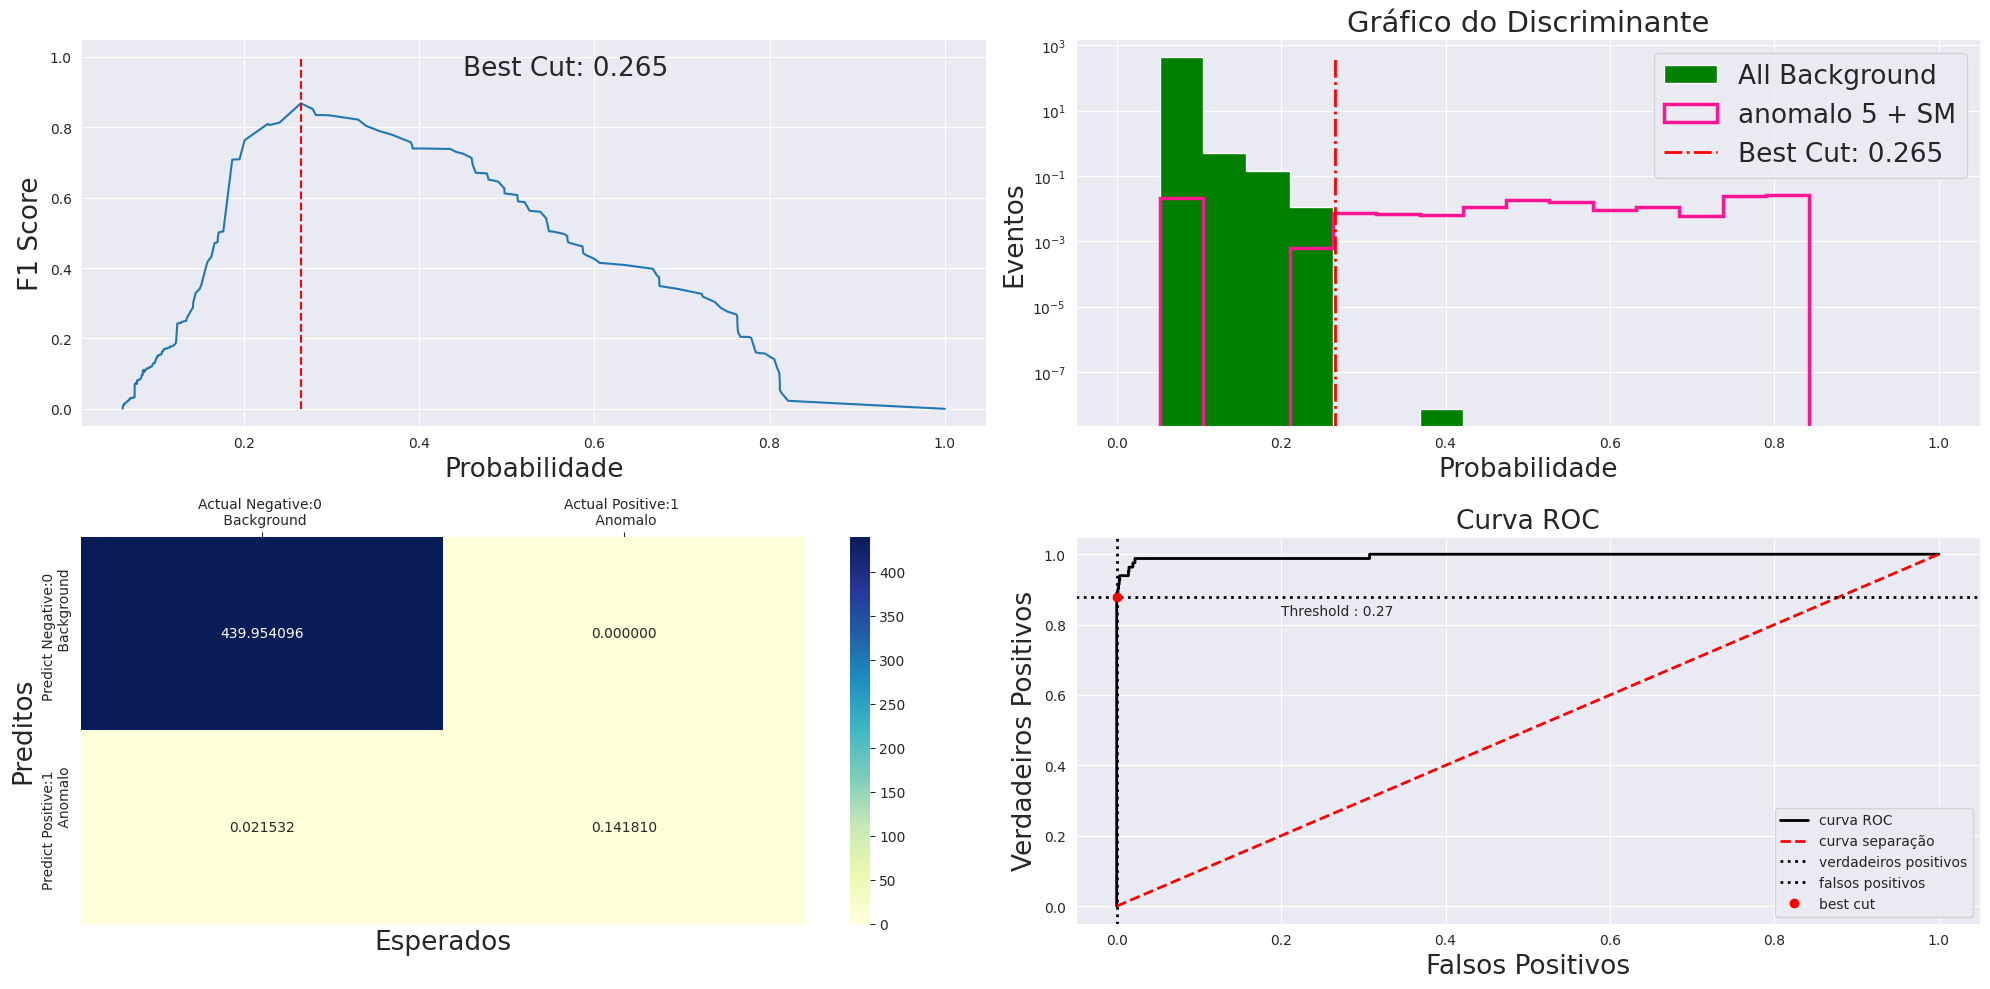

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_5], [1]), prec_anomalo_5 * rec_anomalo_5)
ax[0, 0].plot([best_cut_anomalo_5, best_cut_anomalo_5], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_5), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_5[y_anomalo_5_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_5[y_anomalo_5_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_5[y_anomalo_5_test[0] == 1],
              weights=weight_anomalo_5[y_anomalo_5_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 5 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_5, best_cut_anomalo_5], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_5), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc5 = BinaryClassification(y_anomalo_5_test, lr_probs_anomalo_5, threshold=best_cut_anomalo_5, labels=["Class 1", "Class 2"])
bc5.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm5 = confusion_matrix(y_anomalo_5_test[0], preds_anomalo_5, sample_weight=weight_anomalo_5[0] / 0.3)
cm_matrix5 = pd.DataFrame(data=cm5,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_5 = sns.heatmap(cm_matrix5, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_5.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_5/plot_anomalo_5.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados:

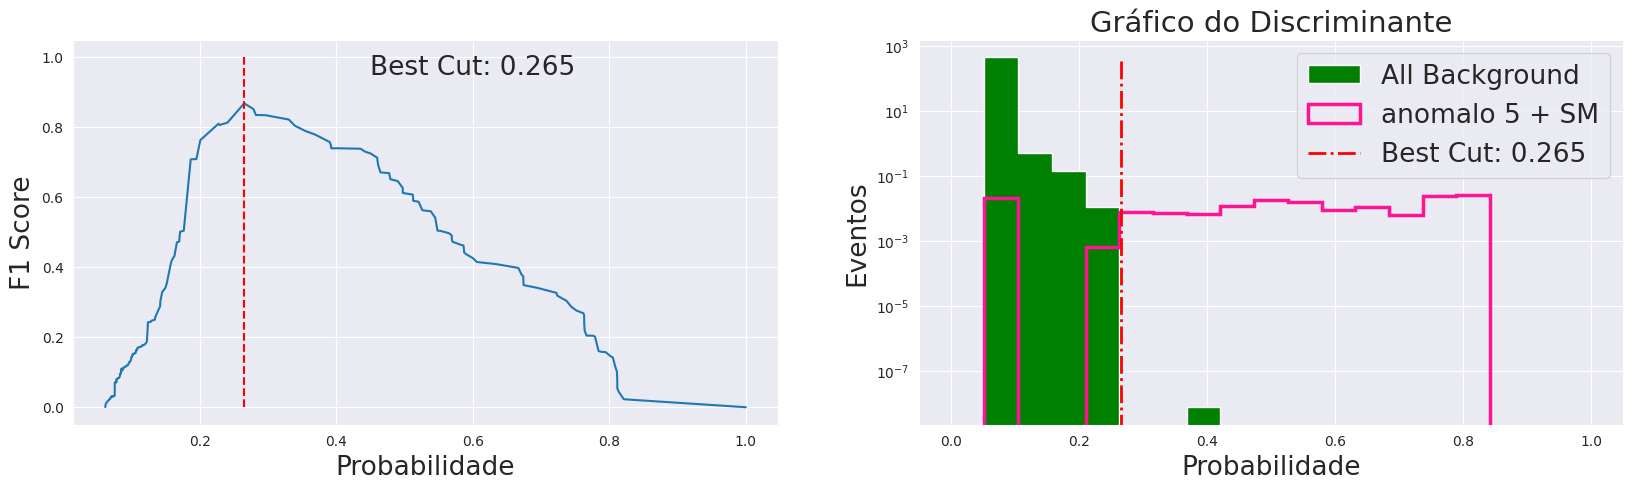

In [30]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_5],[1]),prec_anomalo_5*rec_anomalo_5)
ax[0].plot([best_cut_anomalo_5,best_cut_anomalo_5],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_5), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_5[y_anomalo_5_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_5[y_anomalo_5_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_5[y_anomalo_5_test[0]==1], weights = weight_anomalo_5[y_anomalo_5_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 5 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_5,best_cut_anomalo_5],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_5),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_5/discriminante_f1_score_a5.png',dpi=300)




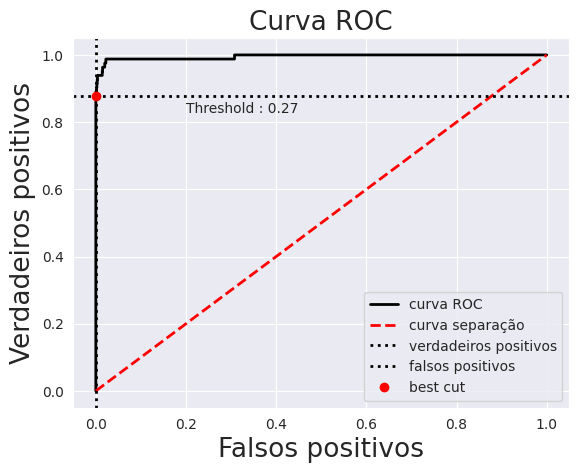

In [31]:
bc5 = BinaryClassification(y_anomalo_5_test, lr_probs_anomalo_5, threshold =best_cut_anomalo_5,labels=["Class 1", "Class 2"])

# Figures
bc5.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_5/curva_ROC_a5.png',dpi=300)

Confusion matrix

 [[4.39954096e+02 7.47077715e-09]
 [2.15317742e-02 1.41810032e-01]]

True negatives(TN) =  439.9540955549681

True positives(TP) =  0.1418100316807178

False negatives(FN) =  7.470777147661551e-09

False positives(FP) =  0.02153177423806898



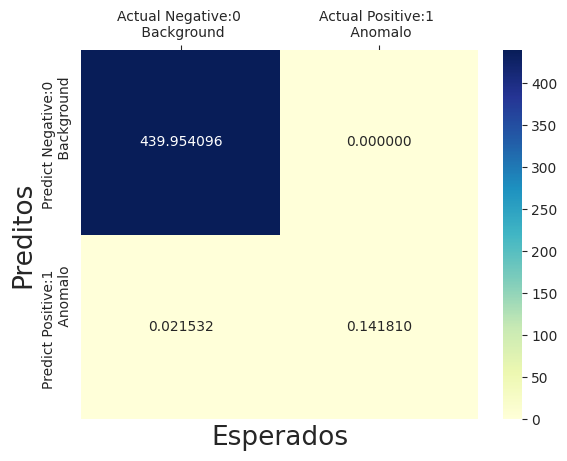

In [32]:
cm5 = confusion_matrix(y_anomalo_5_test[0], preds_anomalo_5, sample_weight = weight_anomalo_5[0]/0.3)
print('Confusion matrix\n\n', cm5)
print('\nTrue negatives(TN) = ', cm5[0,0])
print('\nTrue positives(TP) = ', cm5[1,1])
print('\nFalse negatives(FN) = ', cm5[0,1])
print('\nFalse positives(FP) = ', cm5[1,0])
print('')

cm_matrix5 = pd.DataFrame(data=cm5, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_5 = sns.heatmap(cm_matrix5, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_5.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_5/matriz_de_confusao_a5.png',dpi=100)

## Anomalo 6:

In [33]:
# anomalo 6
ns_probs_anomalo_6 = [0 for _ in range(len(y_anomalo_6_test))]

# predict probabilities
lr_probs_anomalo_6 = voting_clf_soft_6.predict_proba(x_anomalo_6_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_6 = lr_probs_anomalo_6[:, 1]

prec_anomalo_6, rec_anomalo_6, thresh_anomalo_6 = precision_recall_curve(y_anomalo_6_test, lr_probs_anomalo_6, sample_weight = weight_anomalo_6/0.3)
bidx_anomalo_6 = np.argmax(2*prec_anomalo_6 * rec_anomalo_6/(prec_anomalo_6 + rec_anomalo_6))
best_cut_anomalo_6 = thresh_anomalo_6[bidx_anomalo_6]
preds_anomalo_6 = lr_probs_anomalo_6 >= best_cut_anomalo_6

f1_anomalo_6 = f1_score(preds_anomalo_6, y_anomalo_6_test)
print('LightGBM Model f1 score for Anomalous 6: {0:0.4f}'.format(f1_score(y_anomalo_6_test, preds_anomalo_6)))
print('LightGBM Model Precision for Anomalous 6: {0:0.4f}'.format(precision_score(y_anomalo_6_test, preds_anomalo_6)))
print('LightGBM Model Recall for Anomalous 6: {0:0.4f}'.format(recall_score(y_anomalo_6_test, preds_anomalo_6)))


LightGBM Model f1 score for Anomalous 6: 0.8991
LightGBM Model Precision for Anomalous 6: 0.9899
LightGBM Model Recall for Anomalous 6: 0.8235


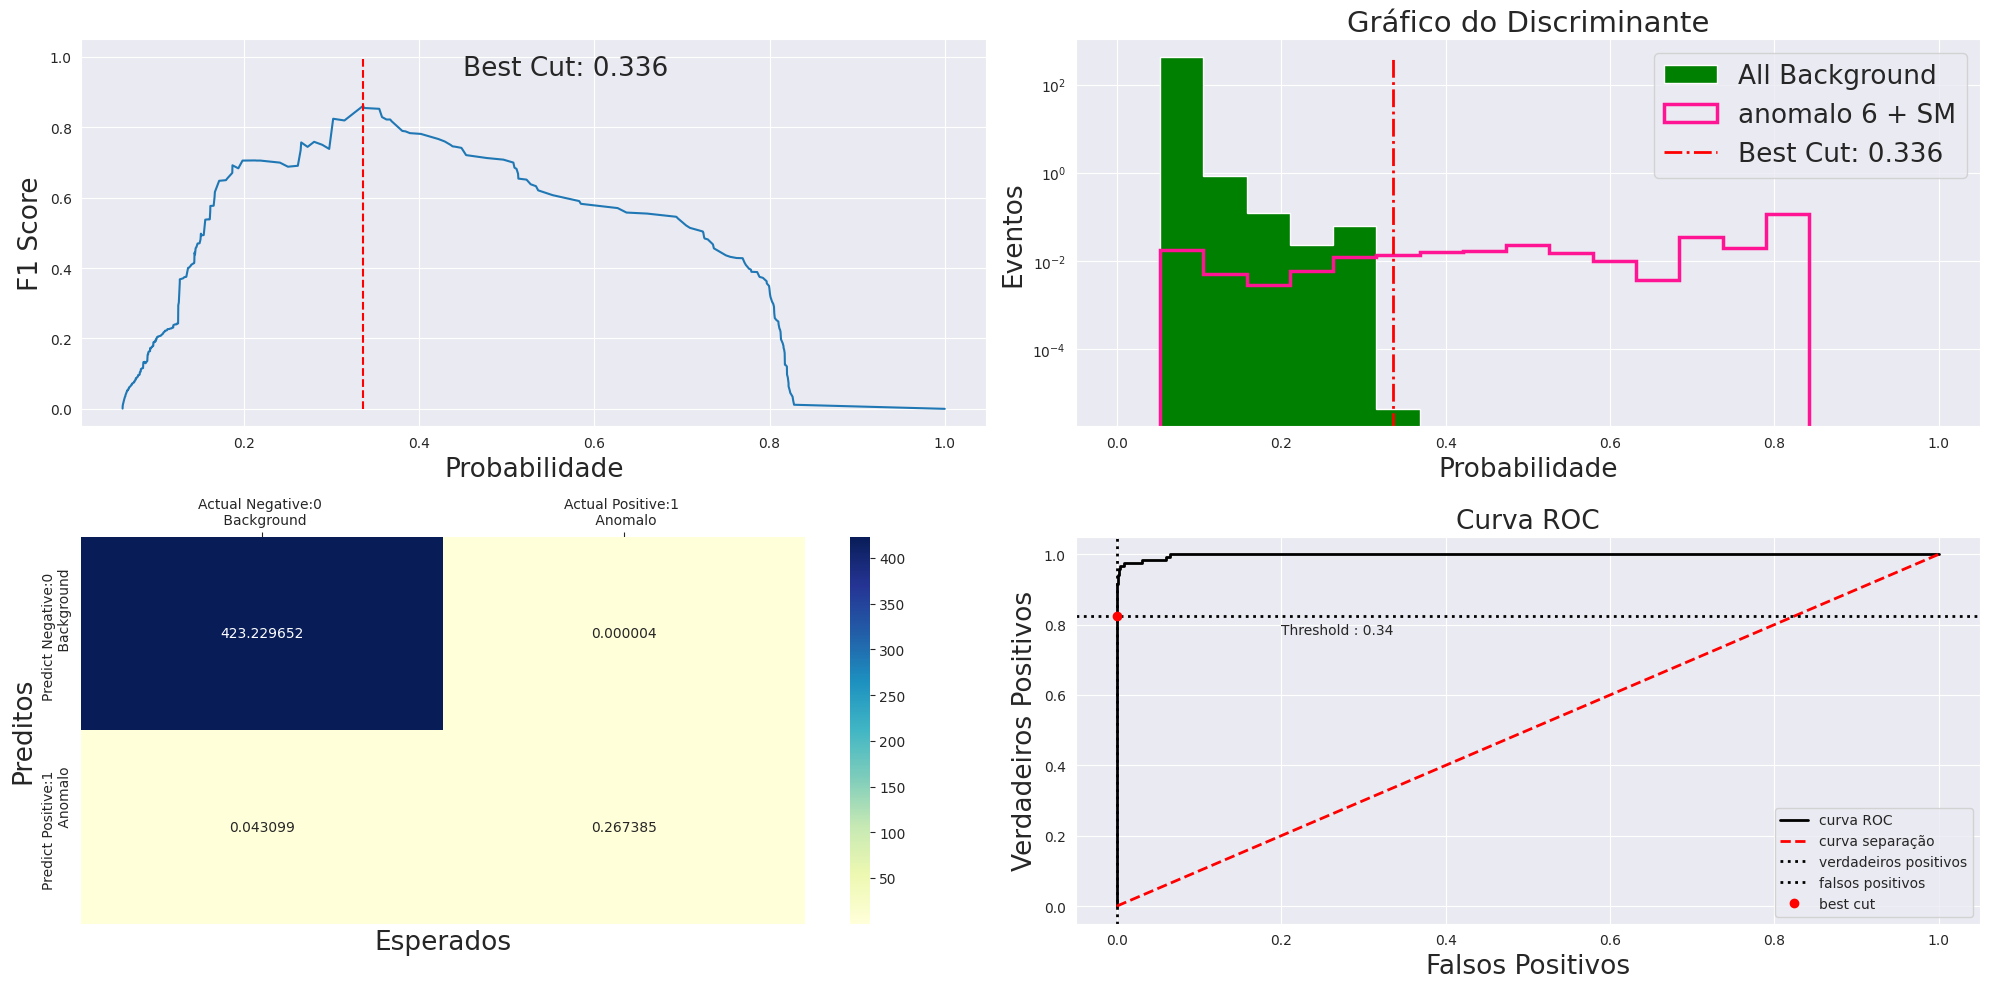

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_6], [1]), prec_anomalo_6 * rec_anomalo_6)
ax[0, 0].plot([best_cut_anomalo_6, best_cut_anomalo_6], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_6), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_6[y_anomalo_6_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_6[y_anomalo_6_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_6[y_anomalo_6_test[0] == 1],
              weights=weight_anomalo_6[y_anomalo_6_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 6 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_6, best_cut_anomalo_6], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_6), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc6 = BinaryClassification(y_anomalo_6_test, lr_probs_anomalo_6, threshold=best_cut_anomalo_6, labels=["Class 1", "Class 2"])
bc6.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm6 = confusion_matrix(y_anomalo_6_test[0], preds_anomalo_6, sample_weight=weight_anomalo_6[0] / 0.3)
cm_matrix6 = pd.DataFrame(data=cm6,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_6 = sns.heatmap(cm_matrix6, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_6.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_6/plot_anomalo_6.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados:

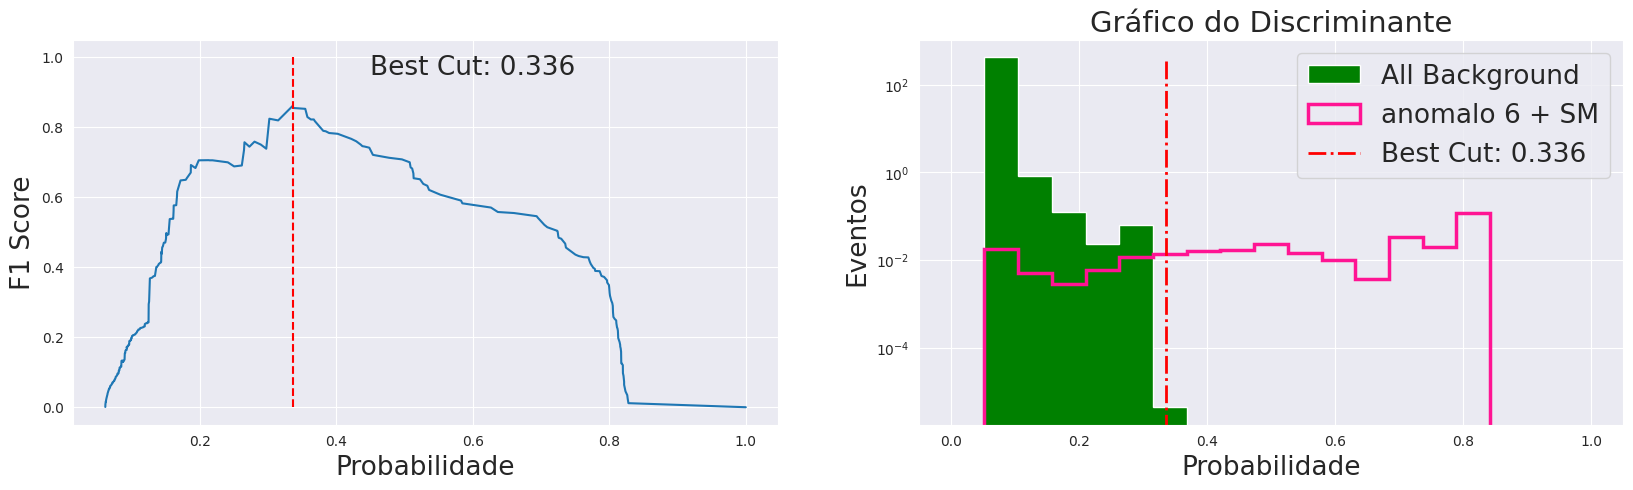

In [35]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_6],[1]),prec_anomalo_6*rec_anomalo_6)
ax[0].plot([best_cut_anomalo_6,best_cut_anomalo_6],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_6), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_6[y_anomalo_6_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_6[y_anomalo_6_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_6[y_anomalo_6_test[0]==1], weights = weight_anomalo_6[y_anomalo_6_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 6 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_6,best_cut_anomalo_6],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_6),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_6/discriminante_f1_score_a6.png',dpi=300)



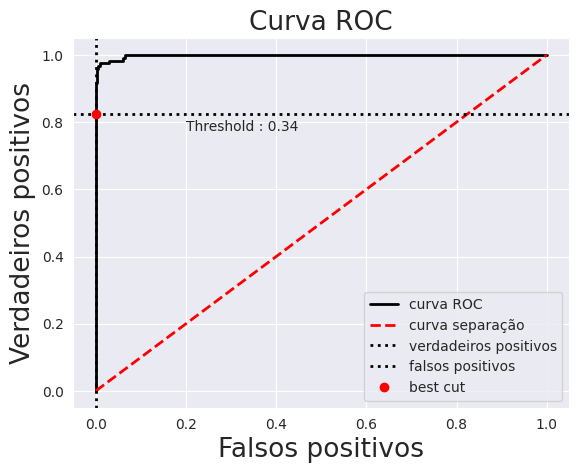

In [36]:
bc6 = BinaryClassification(y_anomalo_6_test, lr_probs_anomalo_6, threshold =best_cut_anomalo_6,labels=["Class 1", "Class 2"])

# Figures
bc6.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_6/curva_ROC_a6.png',dpi=300)

Confusion matrix

 [[4.23229652e+02 4.39501983e-06]
 [4.30985770e-02 2.67384673e-01]]

True negatives(TN) =  423.22965246849486

True positives(TP) =  0.26738467265994564

False negatives(FN) =  4.395019831486197e-06

False positives(FP) =  0.04309857698914551



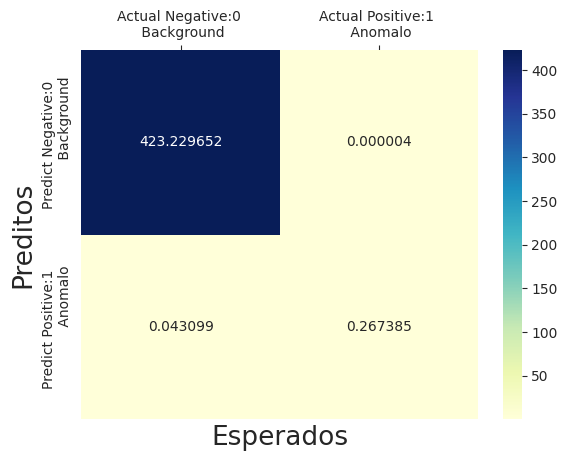

In [37]:
cm6 = confusion_matrix(y_anomalo_6_test[0], preds_anomalo_6, sample_weight = weight_anomalo_6[0]/0.3)
print('Confusion matrix\n\n', cm6)
print('\nTrue negatives(TN) = ', cm6[0,0])
print('\nTrue positives(TP) = ', cm6[1,1])
print('\nFalse negatives(FN) = ', cm6[0,1])
print('\nFalse positives(FP) = ', cm6[1,0])
print('')

cm_matrix6 = pd.DataFrame(data=cm6, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_6 = sns.heatmap(cm_matrix6, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_6.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_6/matriz_de_confusao_a6.png',dpi=100)

## Anomalo 7:

In [38]:
# anomalo 7
ns_probs_anomalo_7 = [0 for _ in range(len(y_anomalo_7_test))]

# predict probabilities
lr_probs_anomalo_7 = voting_clf_soft_7.predict_proba(x_anomalo_7_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_7 = lr_probs_anomalo_7[:, 1]

prec_anomalo_7, rec_anomalo_7, thresh_anomalo_7 = precision_recall_curve(y_anomalo_7_test, lr_probs_anomalo_7, sample_weight = weight_anomalo_7/0.3)
bidx_anomalo_7 = np.argmax(2*prec_anomalo_7 * rec_anomalo_7/(prec_anomalo_7 + rec_anomalo_7))
best_cut_anomalo_7 = thresh_anomalo_7[bidx_anomalo_7]
preds_anomalo_7 = lr_probs_anomalo_7 >= best_cut_anomalo_7

f1_anomalo_7 = f1_score(preds_anomalo_7, y_anomalo_7_test)
print('LightGBM Model f1 score for Anomalous 7: {0:0.4f}'.format(f1_score(y_anomalo_7_test, preds_anomalo_7)))
print('LightGBM Model Precision for Anomalous 7: {0:0.4f}'.format(precision_score(y_anomalo_7_test, preds_anomalo_7)))
print('LightGBM Model Recall for Anomalous 7: {0:0.4f}'.format(recall_score(y_anomalo_7_test, preds_anomalo_7)))


LightGBM Model f1 score for Anomalous 7: 0.9248
LightGBM Model Precision for Anomalous 7: 0.9854
LightGBM Model Recall for Anomalous 7: 0.8712


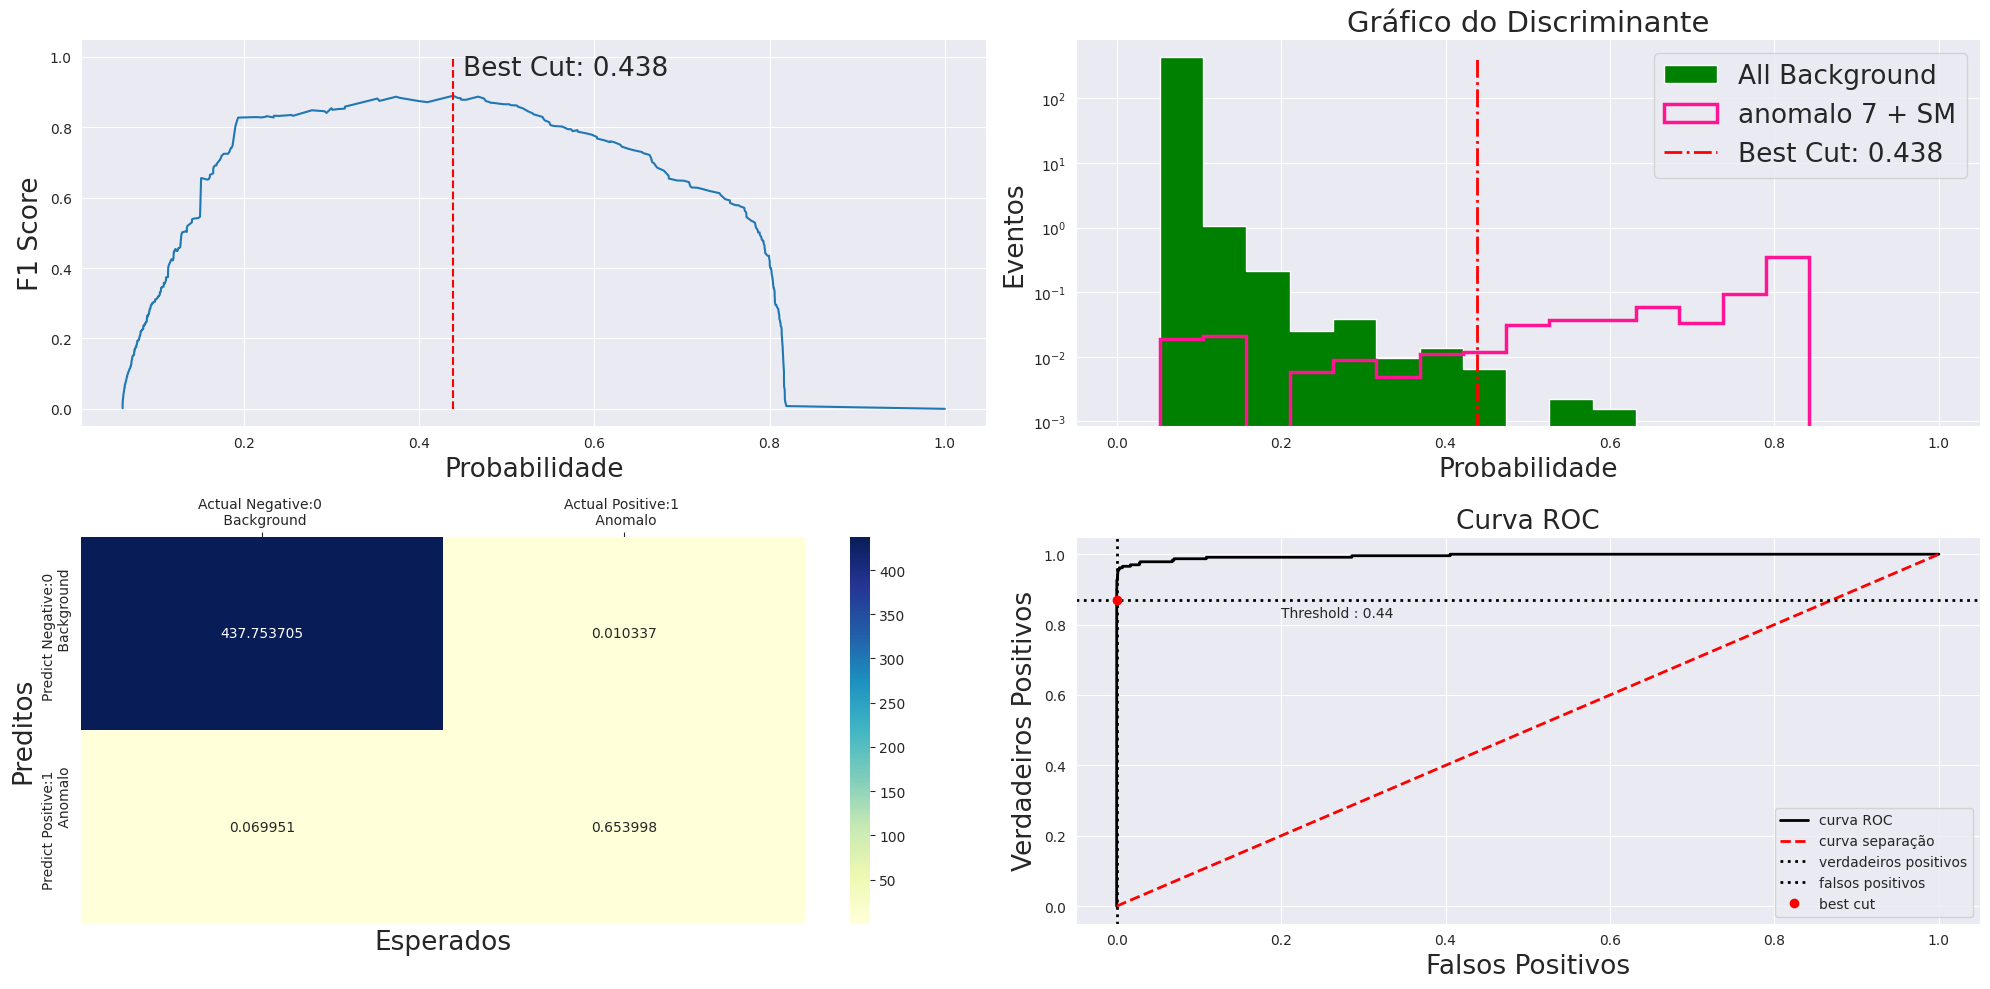

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_7], [1]), prec_anomalo_7 * rec_anomalo_7)
ax[0, 0].plot([best_cut_anomalo_7, best_cut_anomalo_7], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_7), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_7[y_anomalo_7_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_7[y_anomalo_7_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_7[y_anomalo_7_test[0] == 1],
              weights=weight_anomalo_7[y_anomalo_7_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 7 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_7, best_cut_anomalo_7], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_7), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc7 = BinaryClassification(y_anomalo_7_test, lr_probs_anomalo_7, threshold=best_cut_anomalo_7, labels=["Class 1", "Class 2"])
bc7.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm7 = confusion_matrix(y_anomalo_7_test[0], preds_anomalo_7, sample_weight=weight_anomalo_7[0] / 0.3)
cm_matrix7 = pd.DataFrame(data=cm7,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_7 = sns.heatmap(cm_matrix7, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_7.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_7/plot_anomalo_7.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados

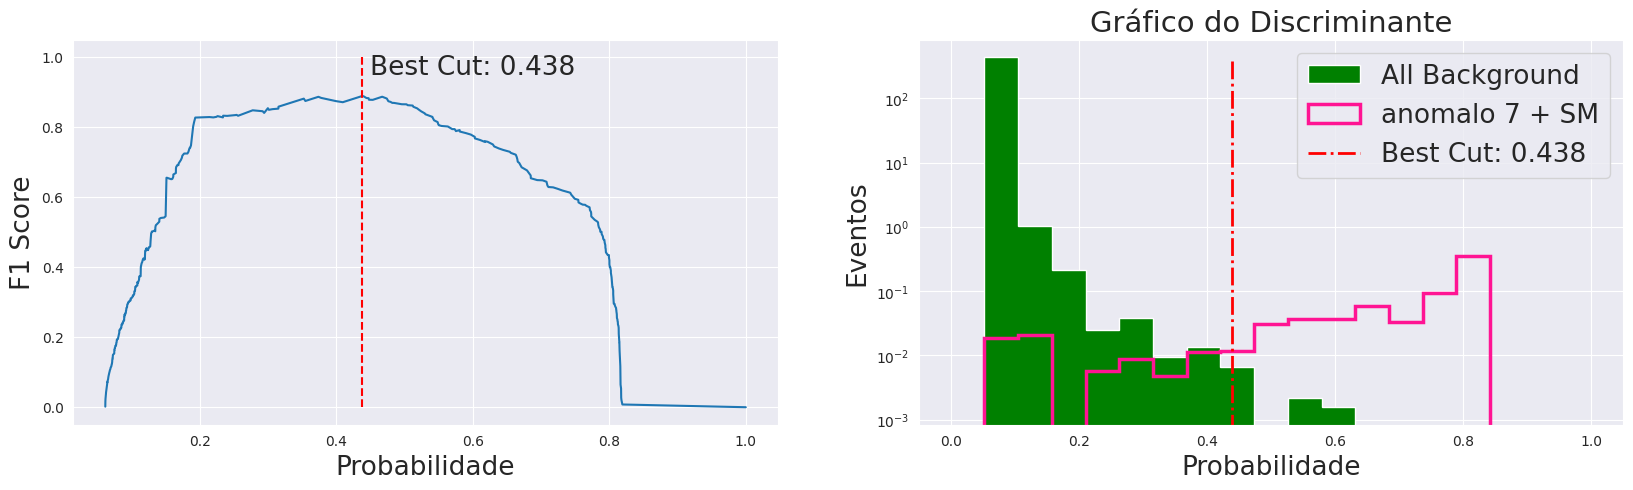

In [40]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_7],[1]),prec_anomalo_7*rec_anomalo_7)
ax[0].plot([best_cut_anomalo_7,best_cut_anomalo_7],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_7), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_7[y_anomalo_7_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_7[y_anomalo_7_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_7[y_anomalo_7_test[0]==1], weights = weight_anomalo_7[y_anomalo_7_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 7 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_7,best_cut_anomalo_7],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_7),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_7/discriminante_f1_score_a7.png',dpi=300)


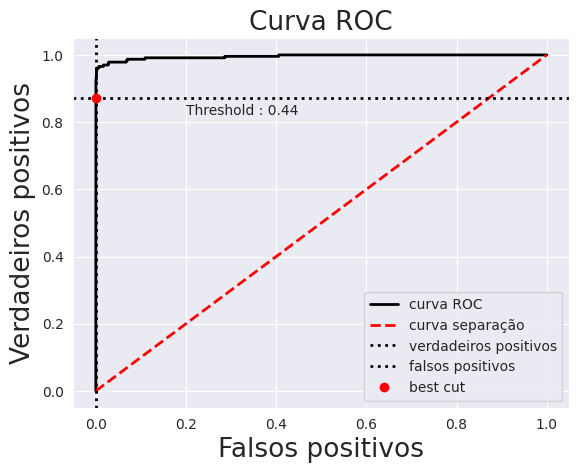

In [41]:
bc7 = BinaryClassification(y_anomalo_7_test, lr_probs_anomalo_7, threshold =best_cut_anomalo_7,labels=["Class 1", "Class 2"])

# Figures
bc7.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_7/curva_ROC_a7.png',dpi=300)

Confusion matrix

 [[4.37753705e+02 1.03367894e-02]
 [6.99512375e-02 6.53998068e-01]]

True negatives(TN) =  437.7537050286086

True positives(TP) =  0.6539980683499854

False negatives(FN) =  0.010336789361545438

False positives(FP) =  0.06995123752297272



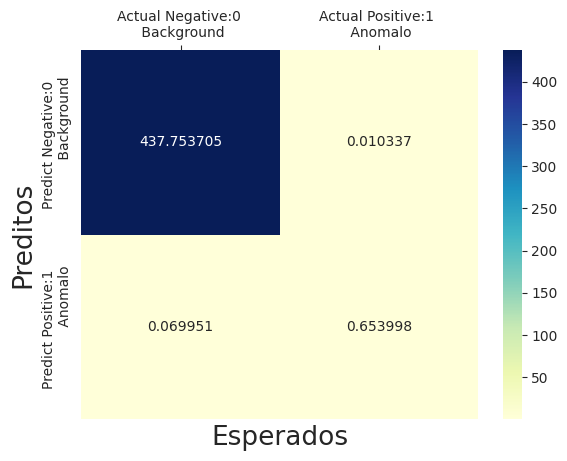

In [42]:
cm7 = confusion_matrix(y_anomalo_7_test[0], preds_anomalo_7, sample_weight = weight_anomalo_7[0]/0.3)
print('Confusion matrix\n\n', cm7)
print('\nTrue negatives(TN) = ', cm7[0,0])
print('\nTrue positives(TP) = ', cm7[1,1])
print('\nFalse negatives(FN) = ', cm7[0,1])
print('\nFalse positives(FP) = ', cm7[1,0])
print('')

cm_matrix7 = pd.DataFrame(data=cm7, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_7 = sns.heatmap(cm_matrix7, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_7.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_7/matriz_de_confusao_a7.png',dpi=100)

## Anomalo 8:

In [43]:
# anomalo 8
ns_probs_anomalo_8 = [0 for _ in range(len(y_anomalo_8_test))]

# predict probabilities
lr_probs_anomalo_8 = voting_clf_soft_8.predict_proba(x_anomalo_8_test)
# keep probabilities for the positive outcome only
lr_probs_anomalo_8 = lr_probs_anomalo_8[:, 1]

prec_anomalo_8, rec_anomalo_8, thresh_anomalo_8 = precision_recall_curve(y_anomalo_8_test, lr_probs_anomalo_8, sample_weight = weight_anomalo_8/0.3)
bidx_anomalo_8 = np.argmax(2*prec_anomalo_8 * rec_anomalo_8/(prec_anomalo_8 + rec_anomalo_8))
best_cut_anomalo_8 = thresh_anomalo_8[bidx_anomalo_8]
preds_anomalo_8 = lr_probs_anomalo_8 >= best_cut_anomalo_8

f1_anomalo_8 = f1_score(preds_anomalo_8, y_anomalo_8_test)
print('LightGBM Model f1 score for Anomalous 8: {0:0.4f}'.format(f1_score(y_anomalo_8_test, preds_anomalo_8)))
print('LightGBM Model Precision for Anomalous 8: {0:0.4f}'.format(precision_score(y_anomalo_8_test, preds_anomalo_8)))
print('LightGBM Model Recall for Anomalous 8: {0:0.4f}'.format(recall_score(y_anomalo_8_test, preds_anomalo_8)))


LightGBM Model f1 score for Anomalous 8: 0.9379
LightGBM Model Precision for Anomalous 8: 0.9689
LightGBM Model Recall for Anomalous 8: 0.9087


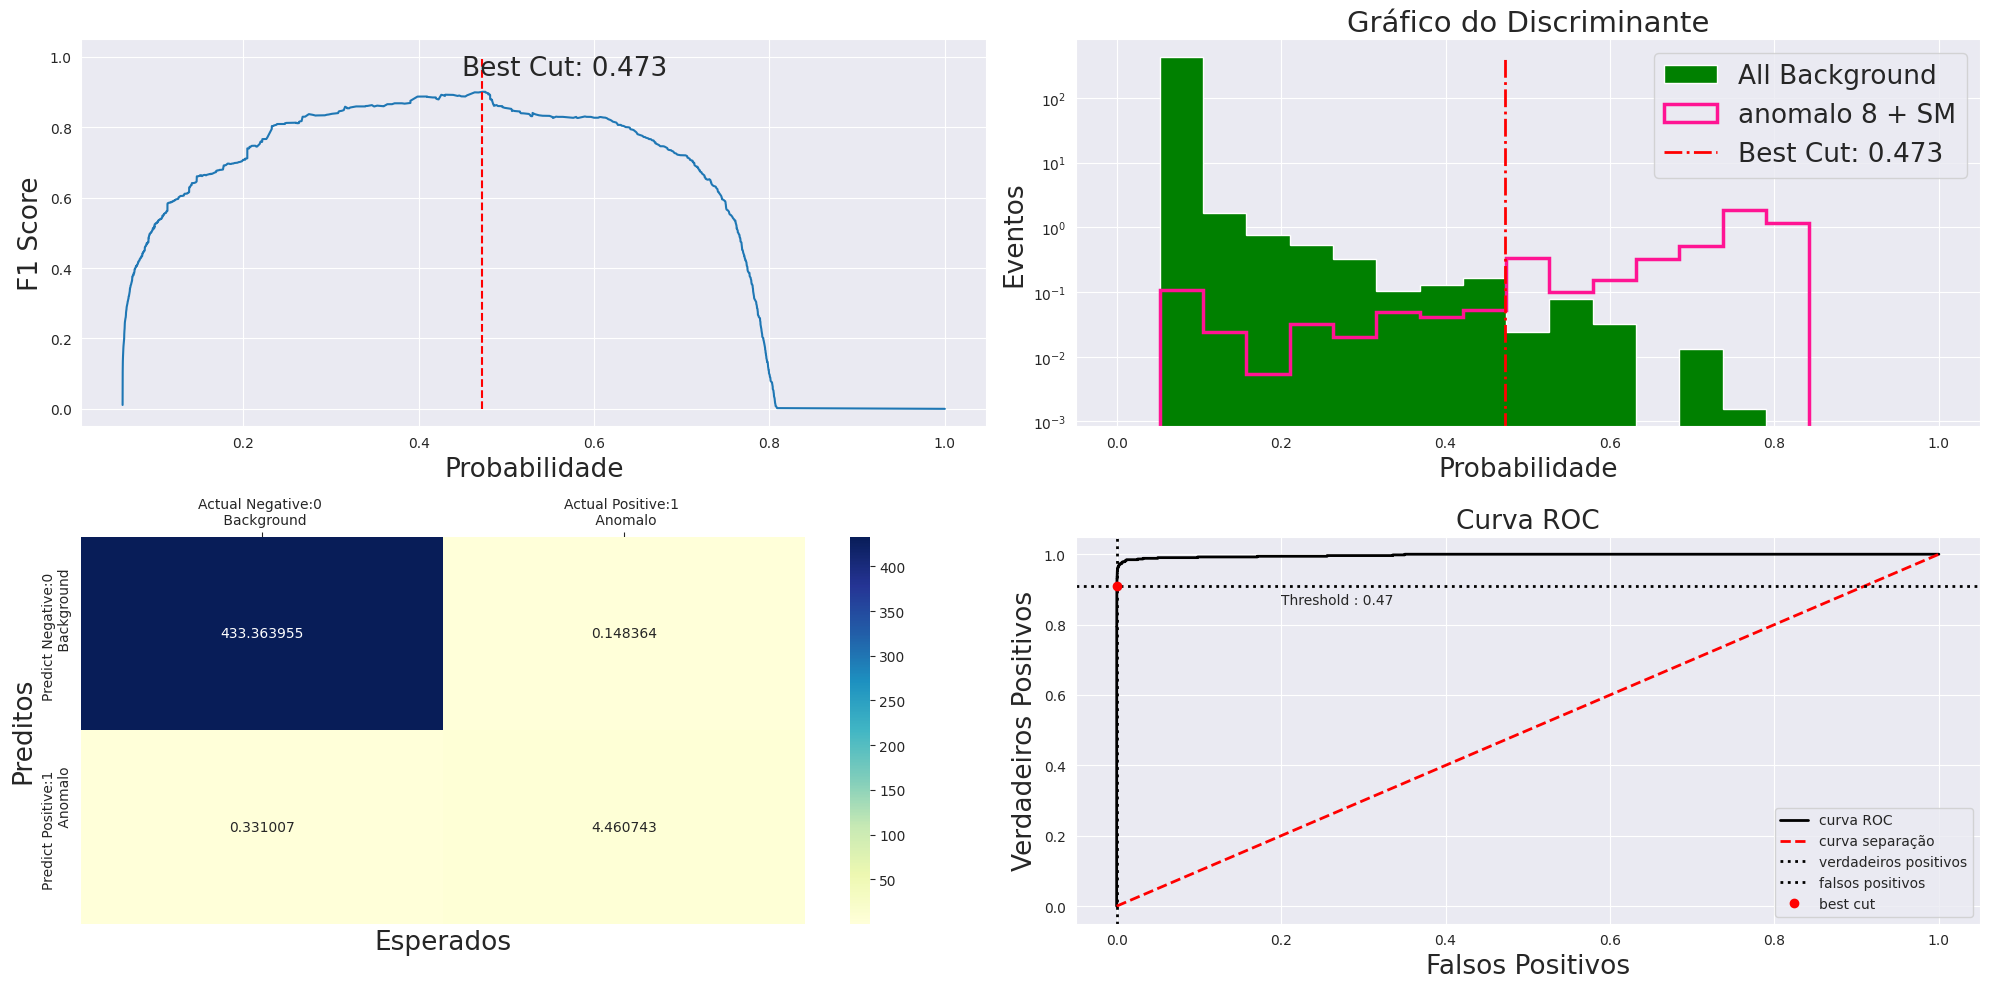

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_8], [1]), prec_anomalo_8 * rec_anomalo_8)
ax[0, 0].plot([best_cut_anomalo_8, best_cut_anomalo_8], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_8), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_8[y_anomalo_8_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_8[y_anomalo_8_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_8[y_anomalo_8_test[0] == 1],
              weights=weight_anomalo_8[y_anomalo_8_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 8 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_8, best_cut_anomalo_8], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_8), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc8 = BinaryClassification(y_anomalo_8_test, lr_probs_anomalo_8, threshold=best_cut_anomalo_8, labels=["Class 1", "Class 2"])
bc8.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm8 = confusion_matrix(y_anomalo_8_test[0], preds_anomalo_8, sample_weight=weight_anomalo_8[0] / 0.3)
cm_matrix8 = pd.DataFrame(data=cm8,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_8 = sns.heatmap(cm_matrix8, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_8.xaxis.tick_top()

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(PATH + PATH4 + '/anomalo_8/plot_anomalo_8.png',dpi=300)

plt.tight_layout()
plt.show()

### Plots separados:

In [ ]:
fig, ax = plt.subplots( 1, 2, figsize=(20,5) )
bins = 20

ax[0].plot(np.append([thresh_anomalo_8],[1]),prec_anomalo_8*rec_anomalo_8)
ax[0].plot([best_cut_anomalo_8,best_cut_anomalo_8],[0,1], ls = '--', color = 'red')
ax[0].text(0.45,0.95,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_8), fontsize = 19)
ax[0].set_ylabel('F1 Score', fontsize = 19)
ax[0].set_xlabel('Probabilidade', fontsize = 19)
#ax[0].set_title(r'anomalo 1 + SM', fontsize = 19)

a = ax[1].hist(lr_probs_anomalo_8[y_anomalo_8_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_8[y_anomalo_8_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1].hist(lr_probs_anomalo_8[y_anomalo_8_test[0]==1], weights = weight_anomalo_8[y_anomalo_8_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 8 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1].plot([best_cut_anomalo_8,best_cut_anomalo_8],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_8),linewidth=2.0, color = 'red')
ax[1].set_ylabel('Eventos', fontsize = 19)
ax[1].set_yscale('log')
ax[1].set_xlabel('Probabilidade', fontsize = 19)
ax[1].legend(loc='best', fontsize = 19)
ax[1].set_title(r'Gráfico do Discriminante', fontsize = 21)


plt.savefig(PATH + PATH4 + '/anomalo_8/discriminante_f1_score_a8.png',dpi=300)


In [ ]:
bc8 = BinaryClassification(y_anomalo_8_test, lr_probs_anomalo_8, threshold =best_cut_anomalo_8,labels=["Class 1", "Class 2"])

# Figures
bc8.plot_roc_curve()
plt.ylabel('Verdadeiros positivos', fontsize = 19)
plt.xlabel('Falsos positivos', fontsize = 19)
plt.title(r'Curva ROC', fontsize = 19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
plt.savefig(PATH + PATH4 + '/anomalo_8/curva_ROC_a8.png',dpi=300)

In [ ]:
cm8 = confusion_matrix(y_anomalo_8_test[0], preds_anomalo_8, sample_weight = weight_anomalo_8[0]/0.3)
print('Confusion matrix\n\n', cm8)
print('\nTrue negatives(TN) = ', cm8[0,0])
print('\nTrue positives(TP) = ', cm8[1,1])
print('\nFalse negatives(FN) = ', cm8[0,1])
print('\nFalse positives(FP) = ', cm8[1,0])
print('')

cm_matrix8 = pd.DataFrame(data=cm8, columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                                 index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])

heatmap_8 = sns.heatmap(cm_matrix8, annot=True, fmt='f', cmap='YlGnBu')
plt.xlabel('Esperados', fontsize = 19)
#heatmap_1.set(xlabel=('Esperados'), ylabel=('Preditos'))
plt.ylabel('Preditos', fontsize = 19)
#plt.title(r'anomalo 1 + SM')
heatmap_8.xaxis.tick_top()
plt.savefig(PATH + PATH4 + '/anomalo_8/matriz_de_confusao_a8.png',dpi=100)

# Testes:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_1], [1]), prec_anomalo_1 * rec_anomalo_1)
ax[0, 0].plot([best_cut_anomalo_1, best_cut_anomalo_1], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_1[y_anomalo_1_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0] == 1],
              weights=weight_anomalo_1[y_anomalo_1_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 1 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_1, best_cut_anomalo_1], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
fpr, tpr, thresholds = roc_curve(y_anomalo_1_test[0], lr_probs_anomalo_1)
roc_auc = auc(fpr, tpr)

ax[1, 1].plot(fpr, tpr, lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
ax[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1, 1].set_xlim([0.0, 1.0])
ax[1, 1].set_ylim([0.0, 1.05])
ax[1, 1].set_xlabel('Falsos Positivos', fontsize=19)
ax[1, 1].set_ylabel('Verdadeiros Positivos', fontsize=19)
ax[1, 1].set_title('Curva ROC', fontsize=19)
ax[1, 1].legend(loc="lower right")

# Adicionar informações à curva ROC
for i, threshold in enumerate(thresholds):
    ax[1, 1].annotate(f'{threshold:.2f}', (fpr[i], tpr[i]), textcoords='offset points', xytext=(5, -10),
                      ha='center', fontsize=8, color='black')

# Gráfico 4 (Matriz de confusão)
cm1 = confusion_matrix(y_anomalo_1_test[0], preds_anomalo_1, sample_weight=weight_anomalo_1[0] / 0.3)
cm_matrix1 = pd.DataFrame(data=cm1,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_1 = sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_1.xaxis.tick_top()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
bins = 20

# Gráfico 1
ax[0, 0].plot(np.append([thresh_anomalo_1], [1]), prec_anomalo_1 * rec_anomalo_1)
ax[0, 0].plot([best_cut_anomalo_1, best_cut_anomalo_1], [0, 1], ls='--', color='red')
ax[0, 0].text(0.45, 0.95, 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), fontsize=19)
ax[0, 0].set_ylabel('F1 Score', fontsize=19)
ax[0, 0].set_xlabel('Probabilidade', fontsize=19)

# Gráfico 2
a = ax[0, 1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0] == 0], histtype='stepfilled',
                  weights=weight_anomalo_1[y_anomalo_1_test[0] == 0][0] / 0.3, color='green',
                  label='All Background', bins=np.linspace(0, 1, bins))
ax[0, 1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0] == 1],
              weights=weight_anomalo_1[y_anomalo_1_test[0] == 1][0] / 0.3, color='deeppink',
              ls='-', linewidth=2.5, label=r'anomalo 1 + SM', histtype='step', bins=np.linspace(0, 1, bins))
ax[0, 1].plot([best_cut_anomalo_1, best_cut_anomalo_1], [0, (a[0]).max()], ls='-.', label='Best Cut: {0:0.3f}'.format(best_cut_anomalo_1), linewidth=2.0, color='red')
ax[0, 1].set_ylabel('Eventos', fontsize=19)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Probabilidade', fontsize=19)
ax[0, 1].legend(loc='best', fontsize=19)
ax[0, 1].set_title(r'Gráfico do Discriminante', fontsize=21)

# Gráfico 3 (Curva ROC)
bc1 = BinaryClassification(y_anomalo_1_test, lr_probs_anomalo_1, threshold=best_cut_anomalo_1, labels=["Class 1", "Class 2"])
bc1.plot_roc_curve()
plt.ylabel('Verdadeiros Positivos', fontsize=19)
plt.xlabel('Falsos Positivos', fontsize=19)
plt.title(r'Curva ROC', fontsize=19)
plt.legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"], loc='best', fontsize=10)
ax[1, 1] = plt.gca()  # Obter os eixos atuais

# Gráfico 4 (Matriz de confusão)
cm1 = confusion_matrix(y_anomalo_1_test[0], preds_anomalo_1, sample_weight=weight_anomalo_1[0] / 0.3)
cm_matrix1 = pd.DataFrame(data=cm1,
                          columns=['Actual Negative:0 \n Background', 'Actual Positive:1 \n Anomalo'],
                          index=['Predict Negative:0 \n Background', 'Predict Positive:1 \n Anomalo'])
heatmap_1 = sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_xlabel('Esperados', fontsize=19)
ax[1, 0].set_ylabel('Preditos', fontsize=19)

# Ajustar a posição do rótulo do eixo x do heatmap
heatmap_1.xaxis.tick_top()

plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(24,15))

# First plot
a = ax[0,0].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_1[y_anomalo_1_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[0,0].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==1], weights = weight_anomalo_1[y_anomalo_1_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 1 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[0,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1),linewidth=2.0, color = 'red')
ax[0,0].set_ylabel('Events')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Probabilidade')
ax[0,0].legend(loc='upper center', fontsize = 19)

# Second plot
ax[1,0].plot(np.append([thresh_anomalo_1],[1]),prec_anomalo_1*rec_anomalo_1)
ax[1,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,1], ls = '--', color = 'red')
ax[1,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1))
ax[1,0].set_ylabel('F1 Score')
ax[1,0].set_xlabel('Probabilidade')
ax[1,0].set_title(r'anomalo 1 + SM')

bc1 = BinaryClassification(y_anomalo_1_test, lr_probs_anomalo_1, threshold =best_cut_anomalo_1,labels=["Class 1", "Class 2"])

# Third plot, assuming plot_roc_curve can accept an ax parameter
bc1.plot_roc_curve(ax=ax[0,1])
ax[0,1].set_ylabel('Verdadeiros positivos', fontsize = 19)
ax[0,1].set_xlabel('Falsos positivos', fontsize = 19)
ax[0,1].set_title(r'Curva ROC', fontsize = 19)
ax[0,1].legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)

# Fourth plot
#cm1 = confusion_matrix(y_anomalo_1_test[0], preds_anomalo_1, sample_weight = weight_an

In [ ]:
fig, ax = plt.subplots( 2, 2, figsize=(24,15) )

a = ax[0,0].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_1[y_anomalo_1_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[0,0].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==1], weights = weight_anomalo_1[y_anomalo_1_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 1 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[0,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1),linewidth=2.0, color = 'red')
ax[0,0].set_ylabel('Events')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Probabilidade')
ax[0,0].legend(loc='upper center', fontsize = 19)

ax[1,0].plot(np.append([thresh_anomalo_1],[1]),prec_anomalo_1*rec_anomalo_1)
ax[1,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,1], ls = '--', color = 'red')
ax[1,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1))
ax[1,0].set_ylabel('F1 Score')
ax[1,0].set_xlabel('Probabilidade')
ax[1,0].set_title(r'anomalo 1 + SM')

bc1 = BinaryClassification(y_anomalo_1_test, lr_probs_anomalo_1, threshold =best_cut_anomalo_1,labels=["Class 1", "Class 2"])

# Figures
ax[0,1].bc1.plot_roc_curve()
ax[0,1].set_ylabel('Verdadeiros positivos', fontsize = 19)
ax[0,1].set_xlabel('Falsos positivos', fontsize = 19)
ax[0,1].set_title(r'Curva ROC', fontsize = 19)
ax[0,1].set_legend(["curva ROC","curva separação","verdadeiros positivos","falsos positivos","best cut"],loc='best', fontsize = 10)
#plt.savefig(PATH + PATH4 + '/anomalo_1/curva_ROC.png',dpi=300)

cm1 = confusion_matrix(y_anomalo_1_test[0], preds_anomalo_1, sample_weight = weight_anomalo_1[0]/0.3)
#print('Confusion matrix\n\n', cm1)
#print('\nTrue negatives(TN) = ', cm1[0,0])
#print('\nTrue positives(TP) = ', cm1[1,1])
#print('\nFalse negatives(FN) = ', cm1[0,1])
#print('\nFalse positives(FP) = ', cm1[1,0])
#print('')

cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Negative:0', 'Actual Positive:1'],
                                 index=['Predict Negative:0', 'Predict Positive:1'])

heatmap_1 = sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu')
plt.title(r'anomalo 1 + SM')
#plt.savefig(PATH + PATH4 + '/anomalo_1/matriz_de_confusão_1.png',dpi=300)



In [ ]:
feature_imp1 = pd.DataFrame(sorted(zip(voting_clf_soft_1.best_estimator_.feature_importances_,x_anomalo_1_train.columns)), columns=['Value','Feature'])

sns.barplot(x="Value", y="Feature", data=feature_imp1.sort_values(by="Value", ascending=False))
plt.title(r'$\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6}$ GeV')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots( 2, 1, figsize=(20,10) )
bins = 20

ax[0,0].plot(np.append([thresh_anomalo_1],[1]),prec_anomalo_1*rec_anomalo_1)
ax[0,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,1], ls = '--', color = 'red')
ax[0,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1))
ax[0,0].set_ylabel('F1 Score')
ax[0,0].set_title(r'anomalo 1 + SM')

ax[0,1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_1[y_anomalo_1_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[0,1].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==1], weights = weight_anomalo_1[y_anomalo_1_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 1 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[0,1].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1),linewidth=2.0, color = 'red')
ax[0,1].set_ylabel('Events')
ax[0,1].set_yscale('log')
ax[0,1].legend(loc='upper center', fontsize = 19)

#ax[1,0].
#ax[1,0].plot(sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu'))
#ax[1,0].title(r'anomalo 1 + SM')


#cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Negative:0', 'Actual Positive:1'], index=['Predict Negative:0', 'Predict Positive:1'])
#heatmap_1 = sns.heatmap(cm_matrix1, annot=True, fmt='f', cmap='YlGnBu')
#plt.title(r'anomalo 1 + SM')
# plt.savefig(PATH + 'resultados/matriz_de_confusão/matriz_de_confusão_1.png',dpi=300)


In [ ]:
fig, ax = plt.subplots( 4, 2, figsize=(24,24) )

ax[0,0].plot(np.append([thresh_anomalo_1],[1]),prec_anomalo_1*rec_anomalo_1)
ax[0,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,1], ls = '--', color = 'red')
ax[0,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1))
ax[0,0].set_ylabel('F1 Score')
ax[0,0].set_title(r'anomalo 1 + SM')

ax[0,1].plot(np.append([thresh_anomalo_2],[1]),prec_anomalo_2*rec_anomalo_2)
ax[0,1].plot([best_cut_anomalo_2,best_cut_anomalo_2],[0,1], ls = '--', color = 'red')
ax[0,1].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_2))
ax[0,1].set_ylabel('F1 Score')
ax[0,1].set_title(r'anomalo 2 + SM')

ax[1,0].plot(np.append([thresh_anomalo_3],[1]),prec_anomalo_3*rec_anomalo_3)
ax[1,0].plot([best_cut_anomalo_3,best_cut_anomalo_3],[0,1], ls = '--', color = 'red')
ax[1,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_3))
ax[1,0].set_ylabel('F1 Score')
ax[1,0].set_title(r'anomalo 3 + SM')

ax[1,1].plot(np.append([thresh_anomalo_4],[1]),prec_anomalo_4*rec_anomalo_4)
ax[1,1].plot([best_cut_anomalo_4,best_cut_anomalo_4],[0,1], ls = '--', color = 'red')
ax[1,1].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_4))
ax[1,1].set_ylabel('F1 Score')
ax[1,1].set_title(r'anomalo 4 + SM')

ax[2,0].plot(np.append([thresh_anomalo_5],[1]),prec_anomalo_5*rec_anomalo_5)
ax[2,0].plot([best_cut_anomalo_5,best_cut_anomalo_5],[0,1], ls = '--', color = 'red')
ax[2,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_5))
ax[2,0].set_ylabel('F1 Score')
ax[2,0].set_title(r'anomalo 5 + SM')

ax[2,1].plot(np.append([thresh_anomalo_6],[1]),prec_anomalo_6*rec_anomalo_6)
ax[2,1].plot([best_cut_anomalo_6,best_cut_anomalo_6],[0,1], ls = '--', color = 'red')
ax[2,1].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_6))
ax[2,1].set_ylabel('F1 Score')
ax[2,1].set_title(r'anomalo 6 + SM')

ax[3,0].plot(np.append([thresh_anomalo_7],[1]),prec_anomalo_7*rec_anomalo_7)
ax[3,0].plot([best_cut_anomalo_7,best_cut_anomalo_7],[0,1], ls = '--', color = 'red')
ax[3,0].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_7))
ax[3,0].set_ylabel('F1 Score')
ax[3,0].set_title(r'anomalo 7 + SM')

ax[3,1].plot(np.append([thresh_anomalo_8],[1]),prec_anomalo_8*rec_anomalo_8)
ax[3,1].plot([best_cut_anomalo_8,best_cut_anomalo_8],[0,1], ls = '--', color = 'red')
ax[3,1].text(0.8,0.8,'Best Cut: {0:0.3f}'.format(best_cut_anomalo_8))
ax[3,1].set_ylabel('F1 Score')
ax[3,1].set_title(r'anomalo 8 + SM')

# plt.savefig(PATH + 'resultados/primeiro_plot.png',dpi=300)

In [ ]:
fig, ax = plt.subplots( 4, 2, figsize=(28,28) )
bins = 20

a = ax[0,0].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_1[y_anomalo_1_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[0,0].hist(lr_probs_anomalo_1[y_anomalo_1_test[0]==1], weights = weight_anomalo_1[y_anomalo_1_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 1 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[0,0].plot([best_cut_anomalo_1,best_cut_anomalo_1],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_1),linewidth=2.0, color = 'red')
ax[0,0].set_ylabel('Events')
ax[0,0].set_yscale('log')
ax[0,0].legend(loc='upper center', fontsize = 19)

b = ax[0,1].hist(lr_probs_anomalo_2[y_anomalo_2_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_2[y_anomalo_2_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[0,1].hist(lr_probs_anomalo_2[y_anomalo_2_test[0]==1], weights = weight_anomalo_2[y_anomalo_2_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 2 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[0,1].plot([best_cut_anomalo_2,best_cut_anomalo_2],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_2),linewidth=2.0, color = 'red')
ax[0,1].set_ylabel('Events')
ax[0,1].set_yscale('log')
ax[0,1].legend(loc='upper center', fontsize = 19)

c = ax[1,0].hist(lr_probs_anomalo_3[y_anomalo_3_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_3[y_anomalo_3_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1,0].hist(lr_probs_anomalo_3[y_anomalo_3_test[0]==1], weights = weight_anomalo_3[y_anomalo_3_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 3 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1,0].plot([best_cut_anomalo_3,best_cut_anomalo_3],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_3),linewidth=2.0, color = 'red')
ax[1,0].set_ylabel('Events')
ax[1,0].set_yscale('log')
ax[1,0].legend(loc='upper center', fontsize = 19)

d = ax[1,1].hist(lr_probs_anomalo_4[y_anomalo_4_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_4[y_anomalo_4_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[1,1].hist(lr_probs_anomalo_4[y_anomalo_4_test[0]==1], weights = weight_anomalo_4[y_anomalo_4_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 4 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[1,1].plot([best_cut_anomalo_4,best_cut_anomalo_4],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_4),linewidth=2.0, color = 'red')
ax[1,1].set_ylabel('Events')
ax[1,1].set_yscale('log')
ax[1,1].legend(loc='upper center', fontsize = 19)

e = ax[2,0].hist(lr_probs_anomalo_5[y_anomalo_5_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_5[y_anomalo_5_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[2,0].hist(lr_probs_anomalo_5[y_anomalo_5_test[0]==1], weights = weight_anomalo_5[y_anomalo_5_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 5 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[2,0].plot([best_cut_anomalo_5,best_cut_anomalo_5],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_5),linewidth=2.0, color = 'red')
ax[2,0].set_ylabel('Events')
ax[2,0].set_yscale('log')
ax[2,0].legend(loc='upper center', fontsize = 19)

f = ax[2,1].hist(lr_probs_anomalo_6[y_anomalo_6_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_6[y_anomalo_6_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[2,1].hist(lr_probs_anomalo_6[y_anomalo_6_test[0]==1], weights = weight_anomalo_6[y_anomalo_6_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 6 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[2,1].plot([best_cut_anomalo_6,best_cut_anomalo_6],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_6),linewidth=2.0, color = 'red')
ax[2,1].set_ylabel('Events')
ax[2,1].set_yscale('log')
ax[2,1].legend(loc='upper center', fontsize = 19)

g = ax[3,0].hist(lr_probs_anomalo_7[y_anomalo_7_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_7[y_anomalo_7_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[3,0].hist(lr_probs_anomalo_7[y_anomalo_7_test[0]==1], weights = weight_anomalo_7[y_anomalo_7_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 7 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[3,0].plot([best_cut_anomalo_7,best_cut_anomalo_7],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_7),linewidth=2.0, color = 'red')
ax[3,0].set_ylabel('Events')
ax[3,0].set_yscale('log')
ax[3,0].legend(loc='upper center', fontsize = 19)

h = ax[3,1].hist(lr_probs_anomalo_8[y_anomalo_8_test[0]==0], histtype = 'stepfilled', weights = weight_anomalo_8[y_anomalo_8_test[0]==0][0]/0.3, color = 'green', label ='All Background', bins = np.linspace(0,1,bins) )
ax[3,1].hist(lr_probs_anomalo_8[y_anomalo_8_test[0]==1], weights = weight_anomalo_8[y_anomalo_8_test[0]==1][0]/0.3, color = 'deeppink', ls='-', linewidth=2.5, label = r'anomalo 8 + SM', histtype='step', bins = np.linspace(0,1,bins) )
ax[3,1].plot([best_cut_anomalo_8,best_cut_anomalo_8],[0,(a[0]).max()], ls = '-.', label = 'Best Cut: {0:0.3f}'.format(best_cut_anomalo_8),linewidth=2.0, color = 'red')
ax[3,1].set_ylabel('Events')
ax[3,1].set_yscale('log')
ax[3,1].legend(loc='upper center', fontsize = 19)

# plt.savefig(PATH + 'resultados/segundo_plot.png',dpi=300)